# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión (o Randm Forest), SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica

2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')

6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')

7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')

8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')

9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')

11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')

12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)

13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)

14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)

15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numérico)

17 - cons.price.idx: IPC - indicador mensual (numérico)

18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)

19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)

20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**

21 - y: Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 10 puntos.




----------

<div color= #845ef7ff><h2>Justificación de la Selección de Algoritmos</h2></div>

Dado que el objetivo es predecir una variable binaria (Sí/No) sobre la contratación de un producto bancario, nos encontramos ante un problema de **Clasificación Binaria**. Por este motivo, hemos descartado algoritmos de regresión lineal.

Implementaremos los siguientes **tres algoritmos**:

<div style="background-color: #ffe6ea; border-left: 6px solid #ff99ac; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #d63384;">1. K-Nearest Neighbors (KNN)</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es un algoritmo basado en distancias. Su lógica es muy intuitiva: busca a los clientes más "parecidos" (neighbors) al que queremos analizar.</li>
        <li><b>Lógica:</b> Si los clientes con perfil similar (edad, dinero, trabajo) contrataron el crédito, es probable que este también lo haga.</li>
    </ul>
</div>
<div style="background-color: #fff0f5; border-left: 6px solid #e64980; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #a61e4d;">2. Regresión Logística</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es el modelo base por excelencia para temas de industria bancaria y marketing.</li>
        <li><b>Ventaja:</b> Permite establecer una línea base de rendimiento. Además, no solo clasifica, sino que nos da la <b>probabilidad matemática exacta</b> (ej: "Cliente tiene un 85% de probabilidad de aceptar"), lo cual es útil para priorizar llamadas en una campaña de marketing.</li>
    </ul>
</div>
<div style="background-color: #f3e6ff; border-left: 6px solid #b197fc; padding: 15px; margin-bottom: 20px; border-radius: 5px; color: #5a5a5a;">
    <h4 style="color: #845ef7ff;">3. Random Forest</h4>
    <ul>
        <li><b>Por qué lo elegi:</b> Es la evolución robusta de los Árboles de Decisión(con el objetivo de reducir el overfitting).</li>
        <li><b>Ventaja Principal:</b> Mientras que un Árbol de Decisión simple tiende a memorizar datos (overfitting), el Random Forest generaliza mucho mejor y suele ofrecer la <b>mayor precisión</b> en datos tabulares complejos con mezclas de variables numéricas y categóricas como este.</li>
    </ul>
</div>

------

## 1. Importación de paquetes y dataset

Importación del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc


from sklearn.neighbors import KNeighborsClassifier       # KNN
from sklearn.linear_model import LogisticRegression      # Regresión Logística
from sklearn.ensemble import RandomForestClassifier      # Random Forest

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import export_graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")
df_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


-------

## 2.EDA y Visual EDA

Comenzamos cargando el conjunto de datos de entrenamiento. Mediante .info() y .describe(),

In [2]:
print("--- Información del Dataset ---")
df_train.info()

--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17 

<div style="background-color: #ff69b4; border-left: 6px solid #ff69b4; padding: 15px; border-radius: 5px; color: #5a5a5a;">
    <p>Tras la carga inicial, realizamos una inspección técnica con <code>.info()</code> observando:</p>
    <ul>
        <li><b>Volumen de Datos:<b>41.188 registros</b> (filas) y <b>21 columnas</b>
        <li><b>Tipos de Variables:</b> Existe una mezcla equilibrada:
            <ul>
                <li><b>11 Variables Numéricas</b> (<i>int64, float64</i>): Como <code>age</code>, <code>duration</code>, <code>euribor3m</code>.</li>
                <li><b>10 Variables Categóricas</b> (<i>object</i>): Como <code>job</code>, <code>education</code>, <code>marital</code>. Estas requerirán un preprocesado para que los modelos puedan interpretarlas.</li>
            </ul>
        </li>
        <li><b>Calidad del Dato (Valores Nulos):</b> A primera vista, la función indica que no existen valores nulos (<i>non-null</i>) en ninguna columna. Sin embargo, <b>debemos ser cautos</b>: en este tipo de datasets bancarios es común que los valores perdidos estén camuflados bajo la etiqueta de texto <i>"unknown"</i>, por lo que realizaremos una comprobación específica más adelante.</li>
        <li><b>Target:</b> La variable objetivo es <code>y</code></li>
    </ul>
</div>

In [3]:
print("\n--- Descripción Estadística ---")
display(df_train.describe())



--- Descripción Estadística ---


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<div style="background-color: #fac2f1ff; border-left: 6px solid #cf5d83ff; padding: 15px; border-radius: 5px; color: #5a5a5a;">
    <h3 style="color: #c54c8dff;">Interpretación de Estadísticos Descriptivos</h3>
    <ul>
        <li><b>Anomalía en <code>pdays</code>:</b> Observamos que los percentiles 25%, 50% y 75% tienen el valor <b>999</b>. Esto indica que la gran mayoría de clientes no fueron contactados previamente (999 es un código, no una cantidad real de días). Esto distorsiona la media (962.4) y deberá ser tenido en cuenta, más adelante</li>
        <li><b>Outliers en <code>campaign</code>:</b> Aunque el promedio de llamadas es de 2.5, existe un valor máximo de <b>56 llamadas</b> a un solo cliente, lo cual es un caso extremo (outlier) evidente.</li>
        <li><b>Desbalanceo de Clases (Variable <code>y</code>):</b> La media de la variable objetivo es <b>0.11</b>. Al ser una variable binaria (0/1), esto confirma que solo el <b>11%</b> de los clientes aceptaron el crédito (clase positiva minoritaria).</li>
    </ul>
</div>

In [4]:
df_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [5]:
# Comprobamos si hay valores 'unknown'
nulos_reales = (df_train == 'unknown').sum()

print("--- VALORES PERDIDOS (Etiquetados como 'unknown') ---")
# Filtramos solo las columnas que tengan algo
print(nulos_reales[nulos_reales > 0])

--- VALORES PERDIDOS (Etiquetados como 'unknown') ---
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64



<div style="background-color: #907ee2ff; border-left: 6px solid #6b49e7ff; padding: 15px; border-radius: 5px; color: #000000ff;">
    <h3 style="color: #4c196eff;">Detección de Valores Ocultos</h3>
    <ul>
        <li><b>El problema de <code>default</code>:</b> Encontramos <b>8.597 registros</b> desconocidos en la variable de impago. Una porción muy significativa del dataset (aprox. 20%).
            <br><i>Impacto:</i> Eliminar estas filas supondría una pérdida masiva de información. La estrategia más prudente será tratar "unknown" como una categoría propia o imputarla
        </li>
        <li><b>Educación:</b> La variable <code>education</code> presenta <b>1.731</b> valores perdidos, lo cual es relevante dado que el nivel educativo suele estar correlacionado con el éxito económico.</li>
        <li><b>Otras Variables:</b> En casos como <code>job</code> (330) o <code>marital</code> (80), el impacto es menor y podríamos optar por técnicas de imputación por la moda (valor más frecuente) si fuera necesario.</li>
    </ul>
    <p><b>Conclusión:</b> es necesario realizar una etapa de limpieza específica para gestionar estos valores antes de entrenar los modelos.</p>
</div>

### VISUAL EDA

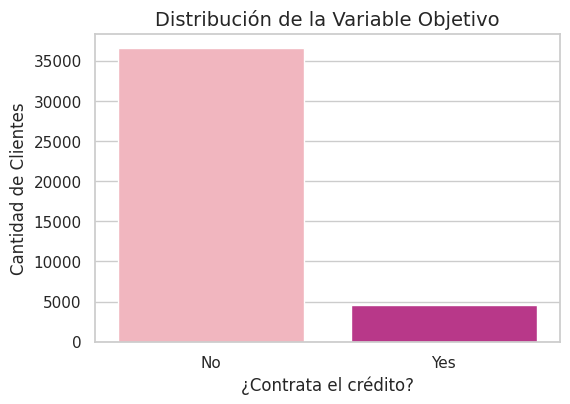

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(x='y', hue='y', data=df_train, palette='RdPu', legend=False)


plt.xticks([0, 1], ['No', 'Yes']) 

plt.title('Distribución de la Variable Objetivo', fontsize=14)
plt.xlabel('¿Contrata el crédito?')
plt.ylabel('Cantidad de Clientes')
plt.show()

<div style="background-color: #fff0f5; padding: 20px; border: 1px solid #ffdeeb; border-left: 5px solid #d63384; border-radius: 5px;">
    <h3 style="color: #a61e4d; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de la Variable Objetivo (Target)
    </h3>
    <p style="color: #555; font-family: sans-serif;">
        En el gráfico anterior observamos la distribución de la variable <b>y</b>, la cual indica si el cliente contrató o no.
    </p>
    <div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffa8a8; margin: 15px 0;">
        <p style="margin: 0 0 10px 0; color: #555;">
            <b style="color: #d63384;">BARRA ALTA (Rosa Claro):</b><br>
            Representa a la gran mayoría de clientes que <b>rechazaron</b> la oferta.
        </p>
        <p style="margin: 0; color: #555;">
            <b style="color: #d63384;">BARRA PEQUEÑA (Rosa Fuerte):</b><br>
            Representa a la minoría que <b>aceptó</b> el crédito.
        </p>
    </div>
    <p style="color: #555; font-family: sans-serif;">
        Este desequilibrio nos indica que <b>no podemos fiarnos únicamente de la métrica de Accuracy</b> (Precisión Global).
    </p>
    <p style="color: #666; font-style: italic; font-size: 0.9em; margin-bottom: 15px;">
        Ejemplo: Si el modelo predijera "No" para todos los clientes, acertaría el 89% de las veces, pero sería inútil para el negocio porque no detectaría ningún cliente potencial.
    </p>
    

</div>

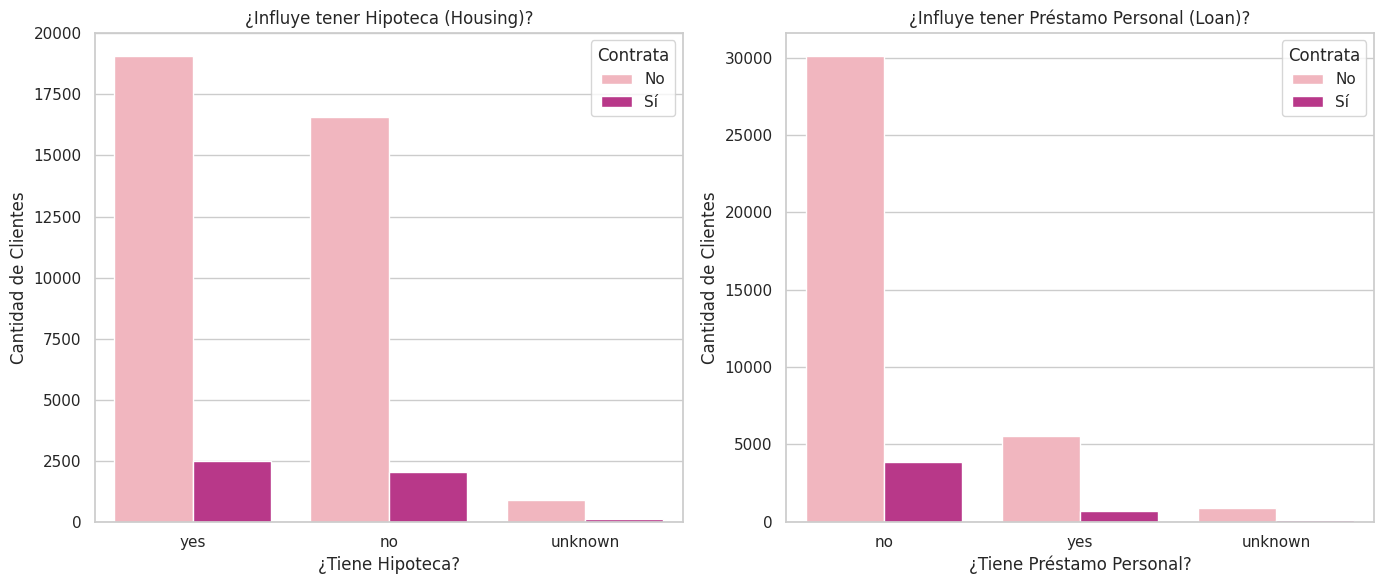

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICA 1: Hipoteca (Housing) vs Resultado
sns.countplot(x='housing', hue='y', data=df_train, palette='RdPu', ax=ax[0])
ax[0].set_title('¿Influye tener Hipoteca (Housing)?')
ax[0].set_xlabel('¿Tiene Hipoteca?')
ax[0].set_ylabel('Cantidad de Clientes')
ax[0].legend(title='Contrata', labels=['No', 'Sí'])

# GRÁFICA 2: Préstamo Personal (Loan) vs Resultado
sns.countplot(x='loan', hue='y', data=df_train, palette='RdPu', ax=ax[1])
ax[1].set_title('¿Influye tener Préstamo Personal (Loan)?')
ax[1].set_xlabel('¿Tiene Préstamo Personal?')
ax[1].set_ylabel('Cantidad de Clientes')
ax[1].legend(title='Contrata', labels=['No', 'Sí'])

plt.tight_layout()
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #d63384; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #a61e4d; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Impacto de Deudas Previas
    </h3>

<p style="margin-bottom: 20px;">
        Hemos analizado si tener cargas financieras previas influye en la decisión de contratar:
    </p>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffadd2; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #d63384; margin-top: 0; margin-bottom: 5px;">1. Hipoteca (<code>housing</code>)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li style="margin-bottom: 5px;">La gran mayoría de los clientes del banco <b>SÍ tienen una hipoteca</b> en vigor.</li>
            <li><b>Observación:</b> Visualmente, la proporción de clientes que contratan se mantiene estable, independientemente de si tienen hipoteca o no. Esto sugiere que tener una casa pagada o no, no es un factor determinante para este producto.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ffadd2; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #d63384; margin-top: 0; margin-bottom: 5px;">2. Préstamo Personal (<code>loan</code>)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li style="margin-bottom: 5px;">A diferencia de la hipoteca, la mayoría de clientes <b>NO tienen préstamos personales</b>.</li>
            <li><b>Observación:</b> Aquellos que no tienen préstamos personales parecen ligeramente más inclinados a contratar, posiblemente debido a una mayor capacidad de ahorro...</li>
        </ul>
</div>

</div>

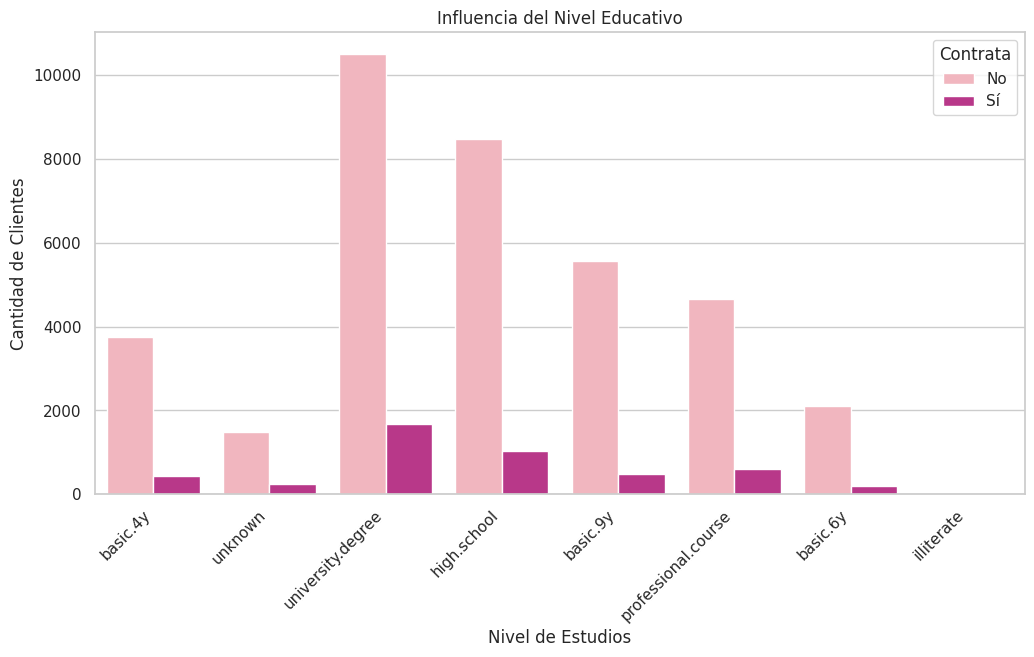

In [8]:
plt.figure(figsize=(12, 6))

# Gráfica: Educación vs Resultado
sns.countplot(x='education', hue='y', data=df_train, palette='RdPu')

# Rotamos etiquetas para que se lean bien
plt.xticks(rotation=45, ha='right')
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel de Estudios')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #cc7b99ff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #da80b0ff; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Influencia del Nivel Educativo
    </h3>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">Dominio Universitario</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>El segmento <b>university.degree</b> no solo es el más numeroso en la base de datos, sino también el que registra, con diferencia, el mayor volumen absoluto de contrataciones (barras rosas oscuras).</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">Educación Básica vs. Superior</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Observamos una tendencia ascendente: a medida que aumenta el nivel educativo (de <i>basic.4y</i> a <i>professional.course</i> y <i>university</i>), aumenta la propensión a aceptar el crédito.</li>
        </ul>
    </div>

<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <span style="font-size: 0.95em;">
           Los clientes con mayor formación tienden a tener mayor estabilidad financiera y capacidad de ahorro, lo que los convierte en objetivo
        </span>
    </div>

</div>

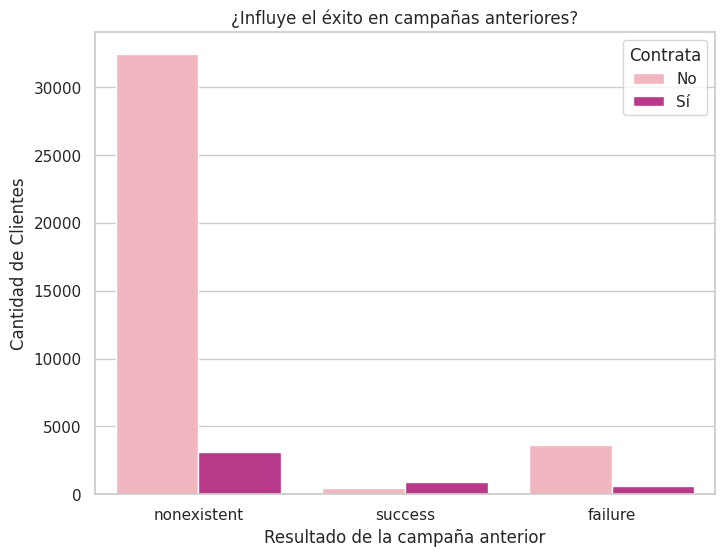

In [9]:
plt.figure(figsize=(8, 6))

# Gráfica: Resultado Anterior vs Resultado Actual
sns.countplot(x='poutcome', hue='y', data=df_train, palette='RdPu')

plt.title('¿Influye el éxito en campañas anteriores?')
plt.xlabel('Resultado de la campaña anterior')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Contrata', labels=['No', 'Sí'])
plt.show()

<div style="background-color: #fff0f5; border: 1px solid #ffdeeb; border-left: 5px solid #c2185b; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">
<p style="margin-bottom: 15px;">
        Analizamos cómo influye el resultado de la campaña de marketing anterior en la decisión actual:
    </p>
<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f48fb1; margin-bottom: 15px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #c2185b; margin-top: 0; margin-bottom: 5px;">"Success"</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aunque son pocos clientes en total, la barra rosa oscura (SÍ) es casi tan alta como la clara (NO)</li>
            <li>Es probable que vuelva a hacerlo</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f48fb1; margin-bottom: 20px; box-shadow: 0 2px 4px rgba(0,0,0,0.02);">
        <h4 style="color: #c2185b; margin-top: 0; margin-bottom: 5px;">"Nonexistent" y "Failure"</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li><b>Nonexistent:</b> La inmensa mayoría de clientes son nuevos (nunca contactados antes). Aquí la tasa de éxito es muy baja</li>
            <li><b>Failure:</b> Si ya nos dijeron que NO en el pasado, es difícil hacerles cambiar de opinión, aunque la tasa es ligeramente mejor que en los contactos nuevos.</li>
        </ul>
    </div>

<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <span style="font-size: 0.95em;">
            Esta variable es <b>oro puro</b> para el algoritmo. Probablemente sea la "Feature" con mayor peso predictivo. El modelo aprenderá rápido la regla: <i>"Si poutcome = success -> Predice SÍ"</i>.
        </span>
    </div>

</div>

<Figure size 1200x1200 with 0 Axes>

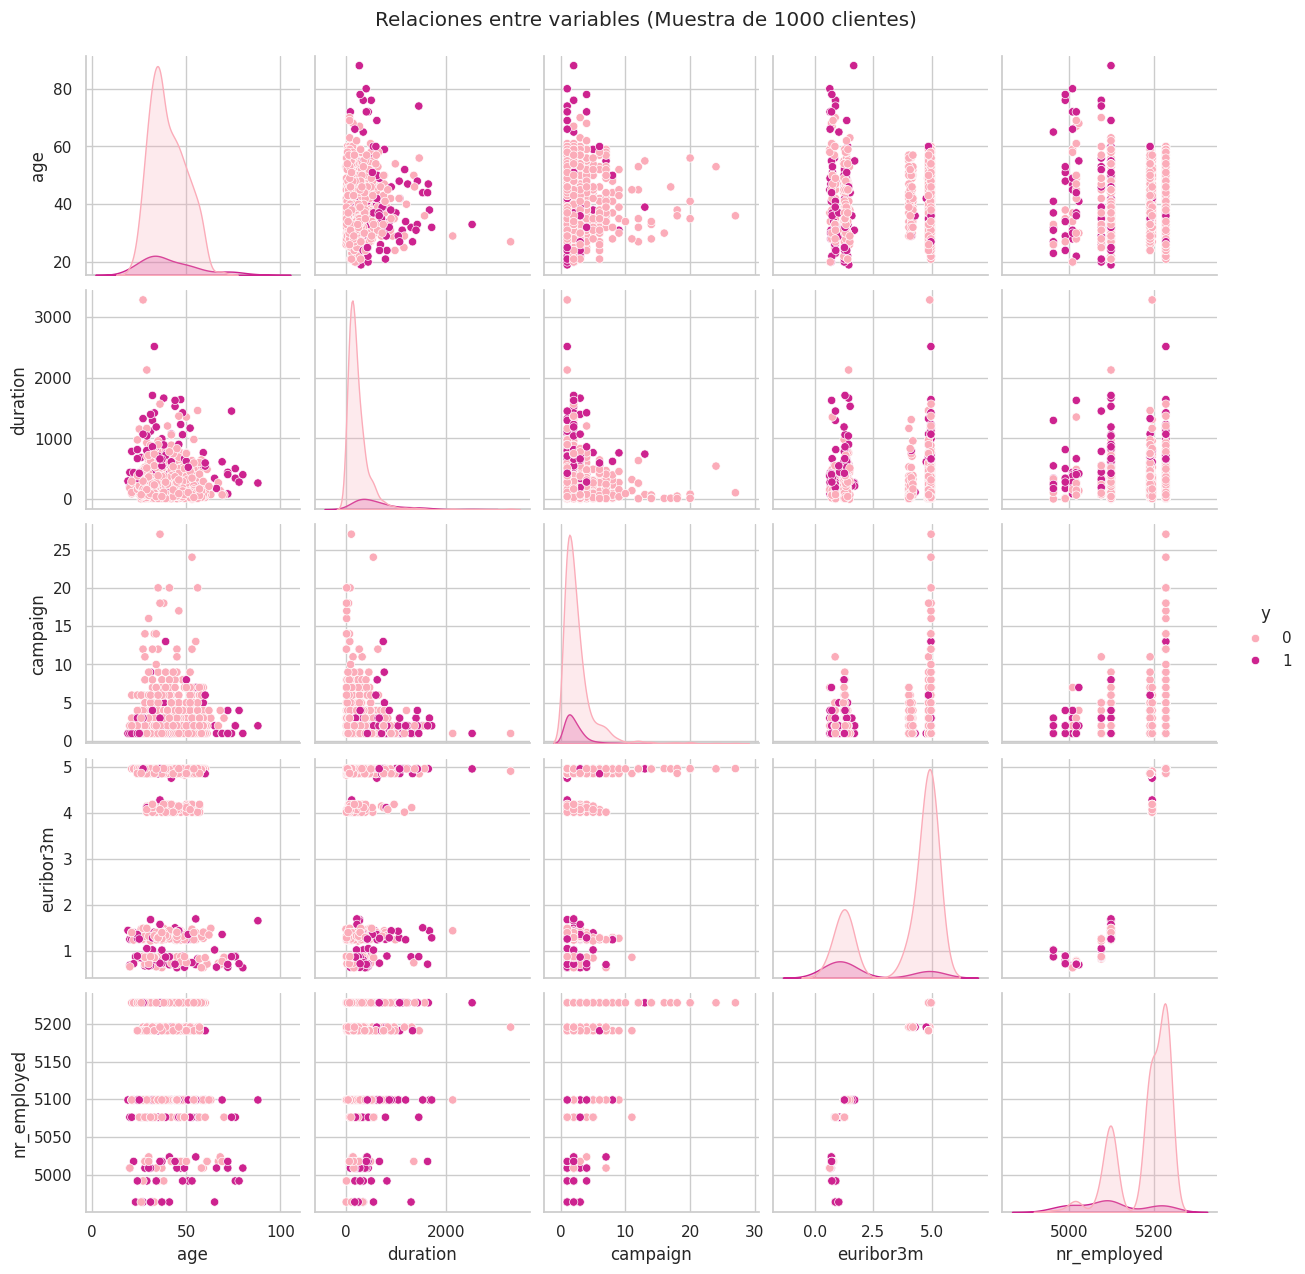

In [10]:


cols_interesantes = ['age', 'duration', 'campaign', 'euribor3m', 'nr_employed', 'y']

# Cogemos una muestra de 1000 clientes al azar
df_sample = df_train[cols_interesantes].sample(n=1000, random_state=42)

plt.figure(figsize=(12, 12))

sns.pairplot(df_sample, hue='y', palette='RdPu', diag_kind='kde')

plt.suptitle("Relaciones entre variables (Muestra de 1000 clientes)", y=1.02)
plt.show()

<div style="background-color: #e9aec2ff; border: 1px solid #ffdeeb; border-left: 5px solid #b15b7bff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #b65777ff; margin-bottom: 15px;">
        <h4 style="color: #9c496dff; margin-top: 0; margin-bottom: 5px;">1. La duración importa mucho (Duration)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Es lo que más llama la atención. Los puntos oscuros (los que compran) se van hacia la derecha, donde la duración es alta.</li>
            <li><b>Conclusión:</b> Básicamente, si la llamada dura muy poco, es casi imposible venderles el crédito. Necesitas tiempo para convencerlos.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #a34464ff; margin-bottom: 15px;">
        <h4 style="color: #aa3f6dff; margin-top: 0; margin-bottom: 5px;">2.(Euribor y Empleados)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>En las gráficas del <code>euribor3m</code> y <code>nr_employed</code>, se ve que la mayoría de los puntos oscuros se acumulan en la parte baja.</li>
            <li><b>Conclusión:</b> Parece que es más fácil que la gente acepte cuando los intereses (Euribor) están bajos. Si están altos, la gente rechaza más.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #b85375ff; margin-bottom: 15px;">
        <h4 style="color: #a1466dff; margin-top: 0; margin-bottom: 5px;">3. (Age)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aquí está todo muy mezclado. Hay puntos claros y oscuros por todas partes.</li>
            <li><b>Conclusión:</b> La edad por sí sola no sirve de mucho para diferenciar, compran y rechazan por igual tengas la edad que tengas.</li>
        </ul>
    </div>

</div>9

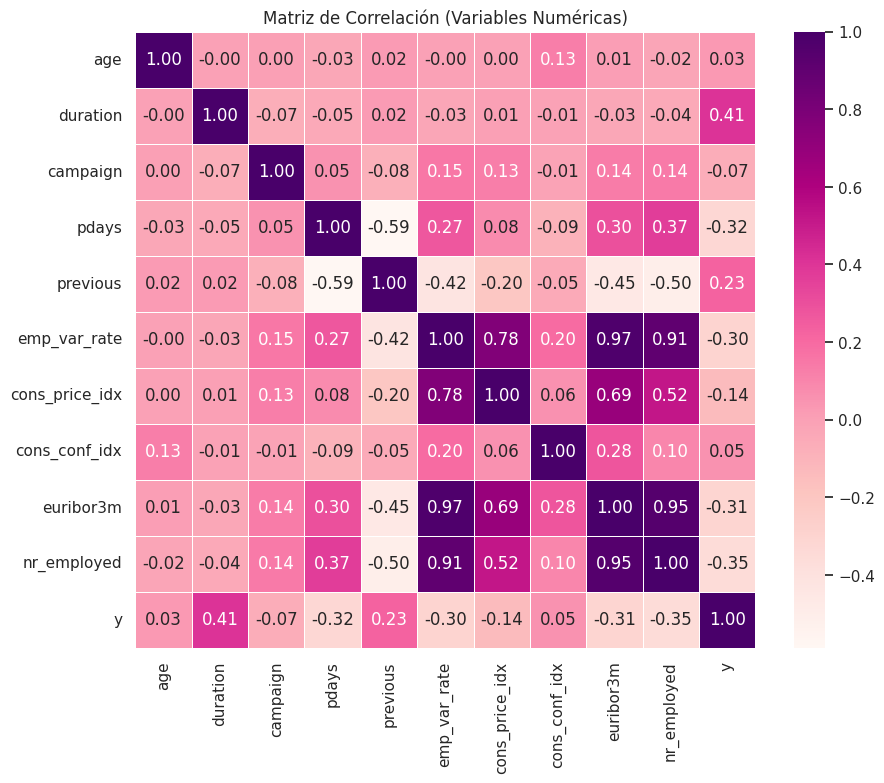

In [11]:
# Filtramos solo las columnas numéricas
df_numeric = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

<div style="background-color: #e6b3c4ff; border: 1px solid #ffdeeb; border-left: 5px solid #d81b60; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #880e4f; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de la Matriz de Correlación
    </h3>
<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">1. Relación con la Variable Objetivo (y)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li><b>Correlación Positiva Moderada (0.4) por 'duration':</b> La variable <code>duration</code> existe una relación : a mayor duración de la llamada, mayor probabilidad de éxito en la contratación.</li>
            <li><b>Correlación Negativa (Factores Económicos): las variables como <code>euribor3m</code> o <code>nr_employed</code> (color pálido)
                la correlación es negativa moderada. Cuando el Euribor sube (economía cara), la contratación baja.
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #f06292; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">2. Multicolinealidad (Redundancia)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Destaca un bloque <b>morado muy oscuro</b> en el centro de la matriz, conectando <code>emp.var.rate</code>, <code>euribor3m</code> y <code>nr_employed</code>.</li>
            <li> Sus coeficientes son casi perfectos (> 0.90). Esto nos indica que las tres variables nos cuentan la misma historia macroeconómica. Para el modelo, esto es información duplicada (redundante) que deberemos vigilar.</li>
        </ul>
    </div>
</div>

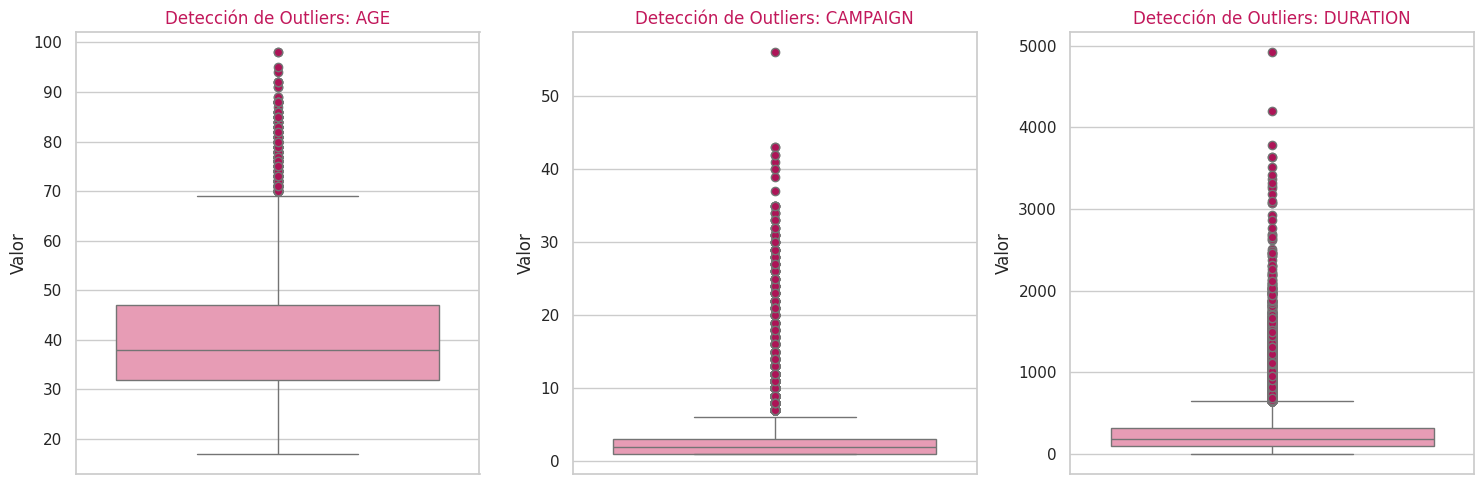

In [12]:
vars_outliers = ['age', 'campaign', 'duration']

plt.figure(figsize=(15, 5))

for i, col in enumerate(vars_outliers):
    plt.subplot(1, 3, i+1)
    # Usamos boxplot con color rosa
    sns.boxplot(y=df_train[col], color='#f48fb1', flierprops={'markerfacecolor': '#ad1457', 'marker': 'o'})
    plt.title(f'Detección de Outliers: {col.upper()}', fontsize=12, color='#c2185b')
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()

<div style="background-color: #eaa6bdff; border: 1px solid #ffdeeb; border-left: 5px solid #a23b61ff; border-radius: 5px; padding: 20px; font-family: sans-serif; line-height: 1.6; color: #555;">

<h3 style="color: #880e4f; margin-top: 0; border-bottom: 2px solid #ffdeeb; padding-bottom: 10px;">
        Análisis de Valores Atípicos (Outliers)
    </h3>

<p style="margin-bottom: 15px;">
        Utilizamos diagramas de caja (Boxplots) para identificar valores extremos que se desvían de la normalidad.
    </p>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">1. Edad (Age)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Vemos bastantes puntos por encima de los 65-70 años.</li>
            <li><b>Decisión:</b> NO los borramos. Tener más de 70 años no es un error. Son personas reales (probablemente jubilados) que pueden querer invertir sus ahorros. Si los borramos, perdemos información sobre este perfil de cliente.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">2. Duration (Duración)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Aparecen llamadas largas.</li>
            <li><b>Decisión:</b> NO eliminar. Una llamada larga suele implicar interés y venta. Si borramos estos datos, eliminamos precisamente los casos de éxito (clase 'Yes'). El modelo necesita verlos.</li>
        </ul>
    </div>

<div style="background-color: white; padding: 15px; border-radius: 5px; border-left: 3px solid #ec407a; margin-bottom: 15px;">
        <h4 style="color: #ad1457; margin-top: 0; margin-bottom: 5px;">3. Campaign (Número de contactos)</h4>
        <ul style="margin-top: 5px; margin-bottom: 0; padding-left: 20px;">
            <li>Vemos casos extremos de hasta 40-50 llamadas a una misma persona.</li>
            <li><b>Decisión:</b> Posible tratamiento. Llamar 50 veces a alguien parece un error de procedimiento o datos "sucios", ya que es improbable que alguien compre tras ser "acosado" tantas veces. Podríamos plantearnos limitar esta variable en el preprocesado.</li>
        </ul>
    </div>
    
    
<div style="background-color: #fce4ec; padding: 10px; border-radius: 4px; border: 1px solid #f8bbd0; text-align: center;">
        <strong style="color: #880e4f;">CONCLUSIÓN PARA MODELADO</strong><br>
        <span style="font-size: 0.95em;">
            La presencia de estos outliers fuertes justifica aún más el uso de <b>Random Forest</b> (robusto a outliers) frente a modelos más sensibles que requerirán un buen escalado (KNN/Logística). Pero veremos cual será el más eficiente al final del notebook
        </span>
    </div>

</div>

------

## 3. Preprocessing data


En esta etapa vamos a hacer 3 cosas obligatorias para que nuestros modelos funcionen:

Eliminar las filas que sean iguales

Quitar los "unknown" (Limpieza).

Convertir datos categóricos a números (Encoding)

Poner todo en la misma escala (Escalado), que se hará en la creación de los modelos.

In [13]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)


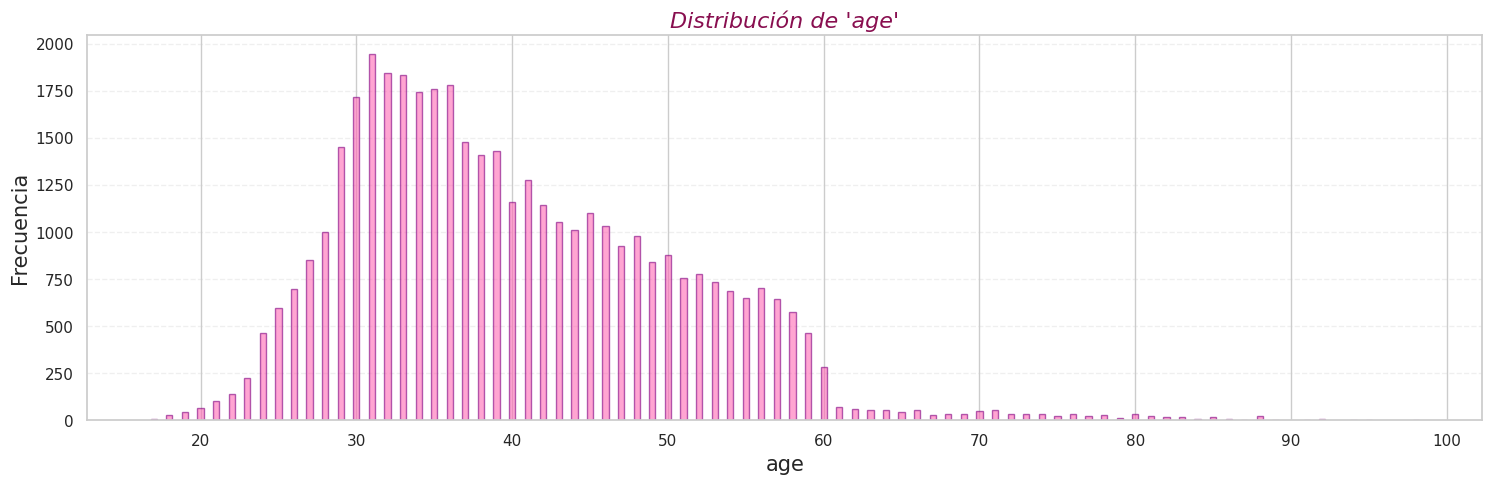

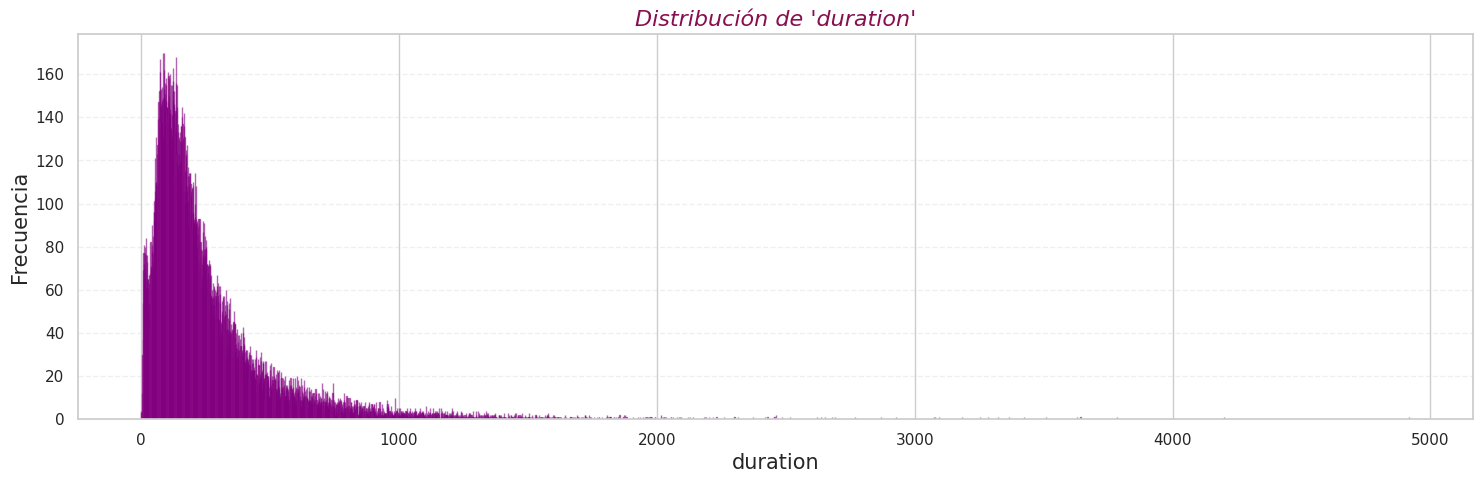

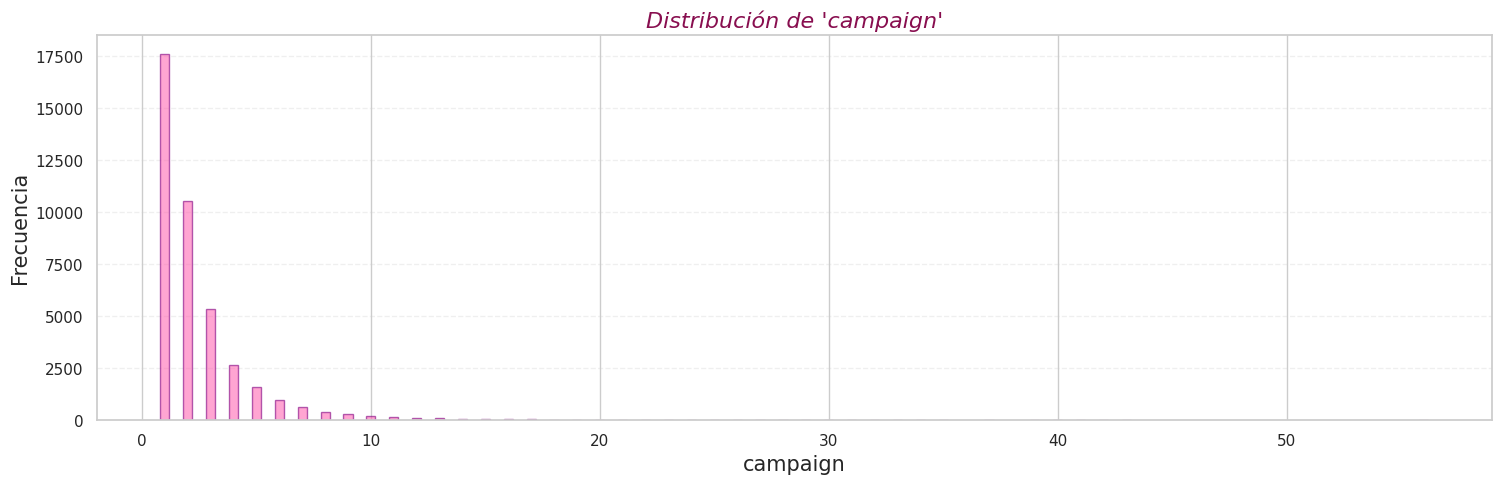

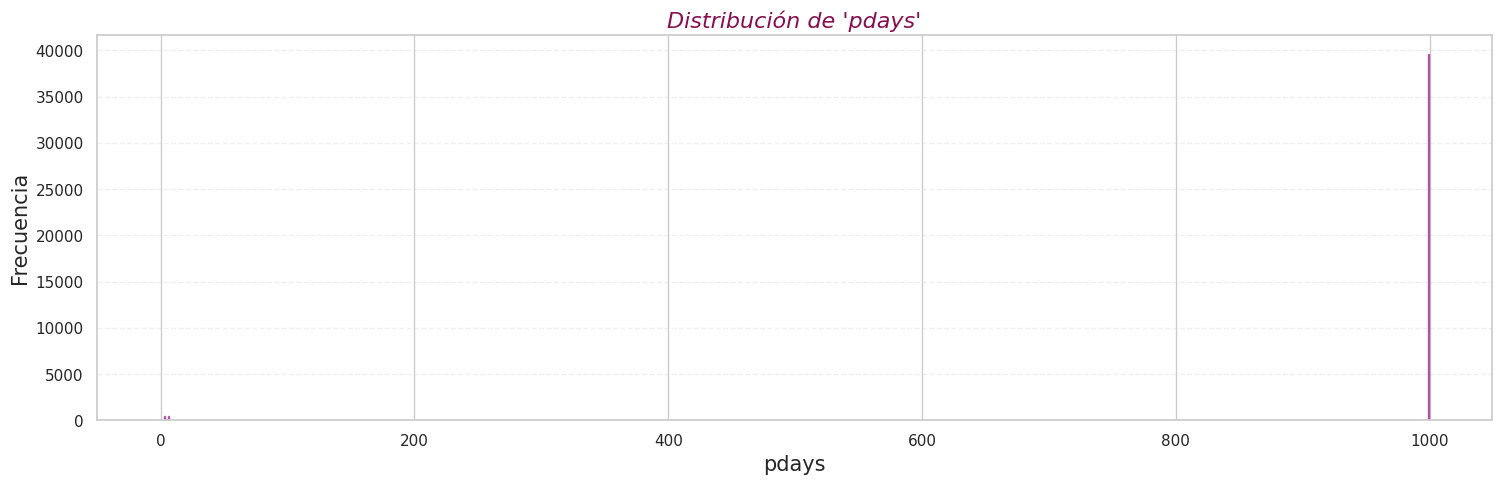

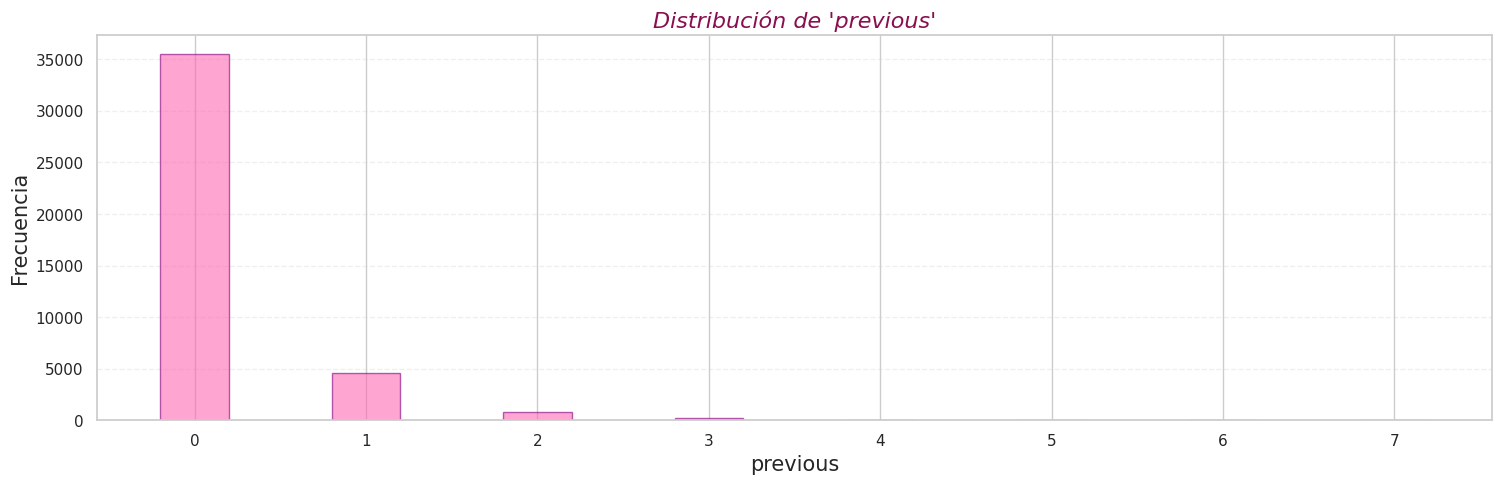

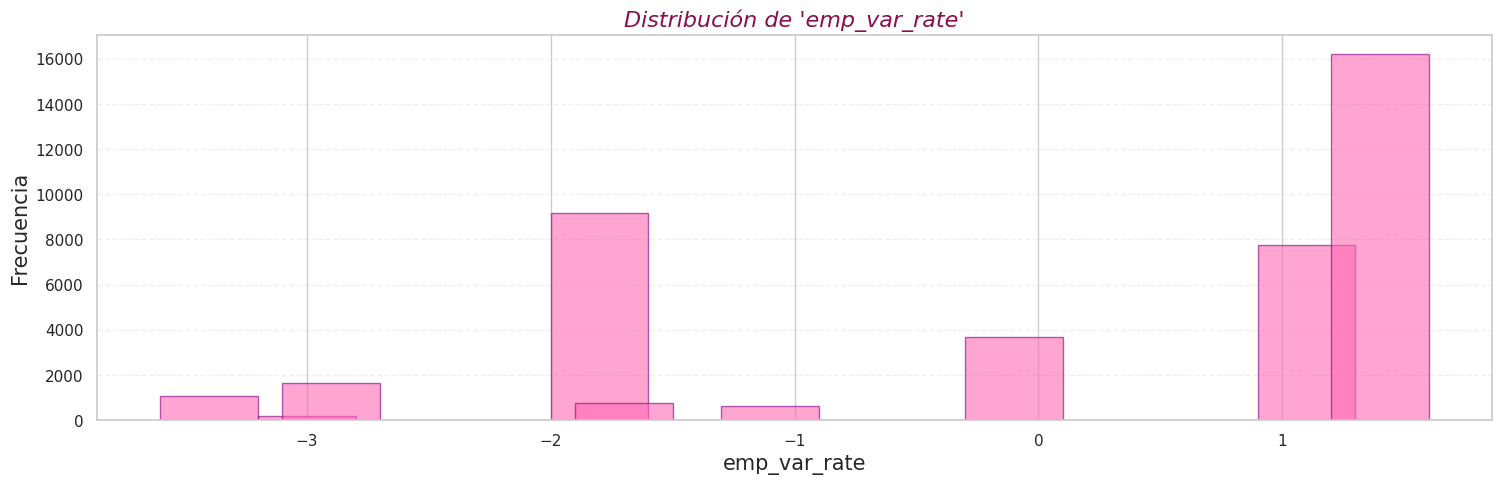

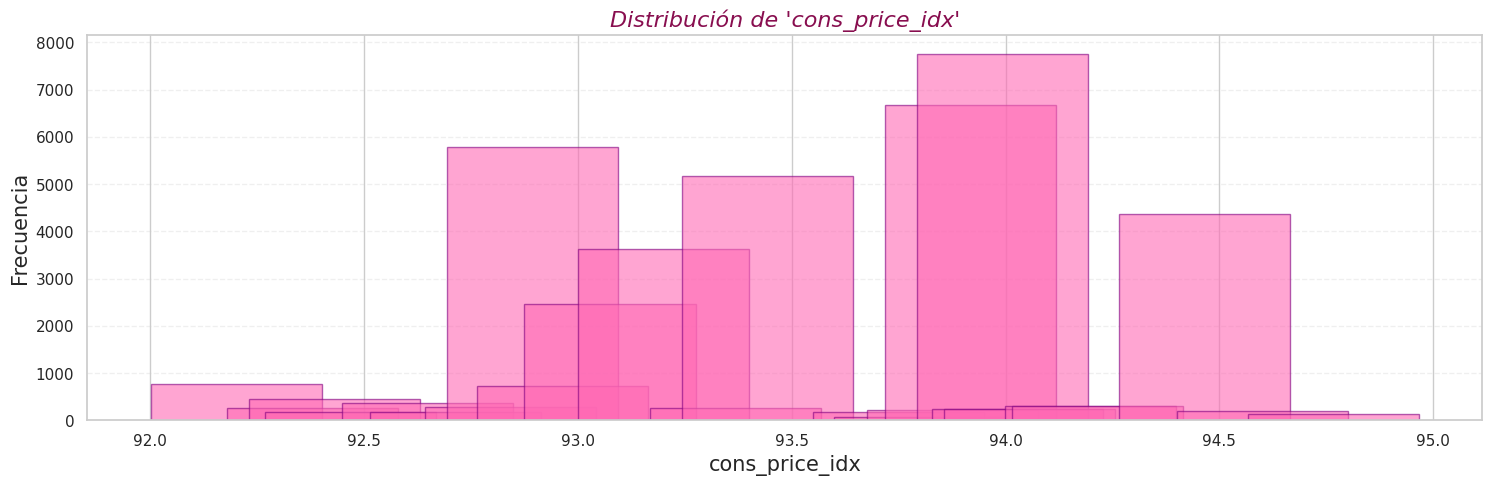

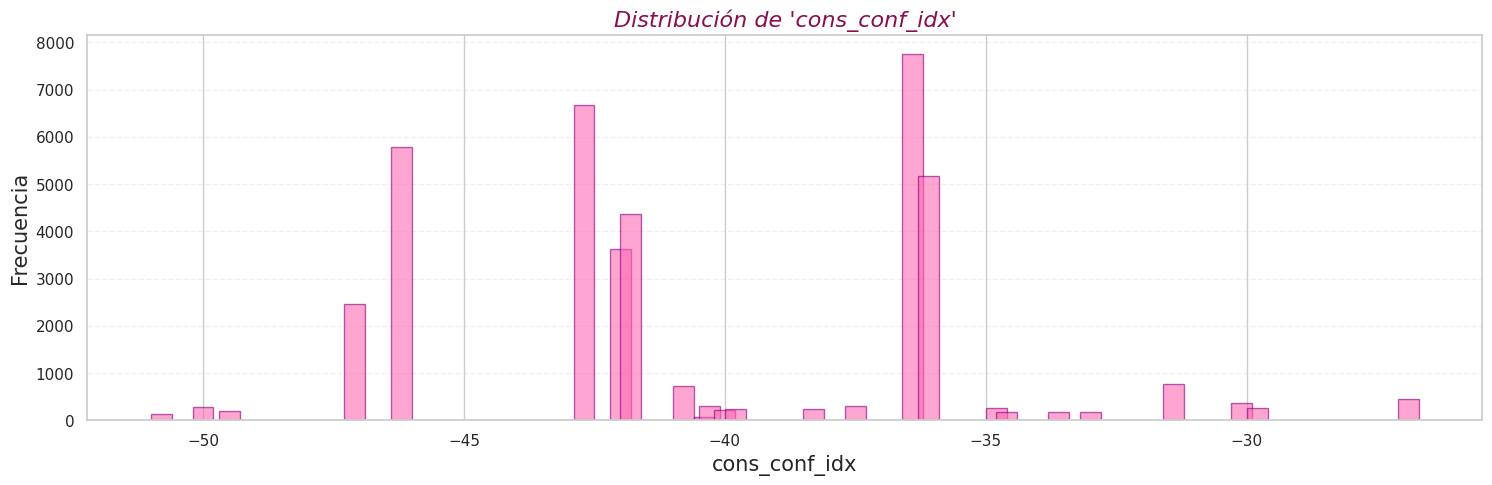

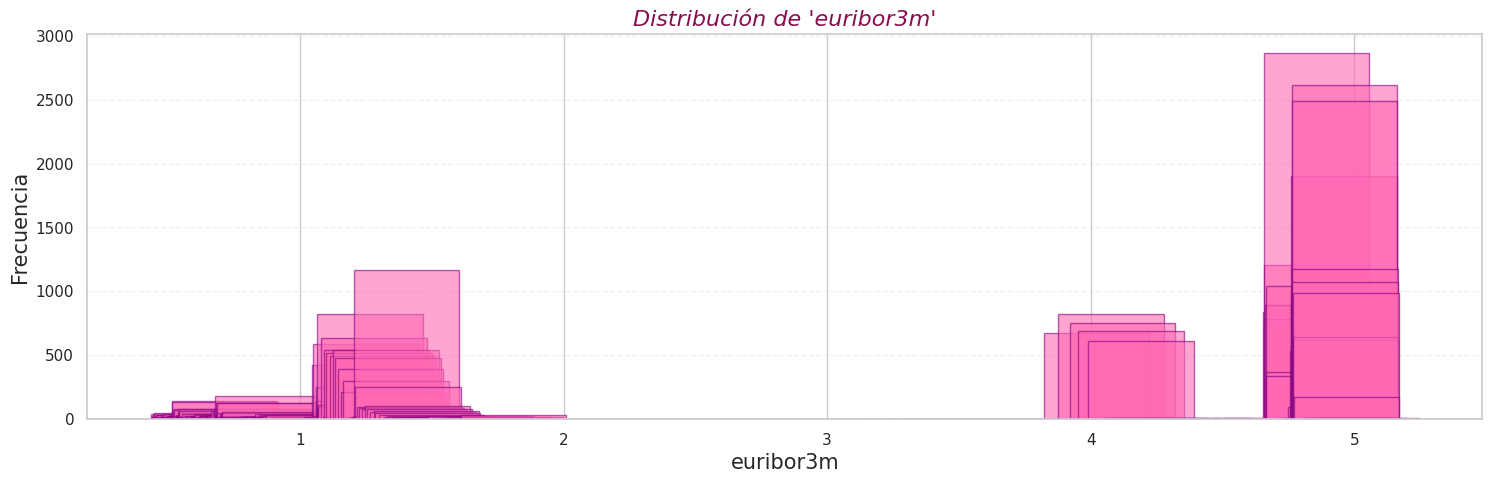

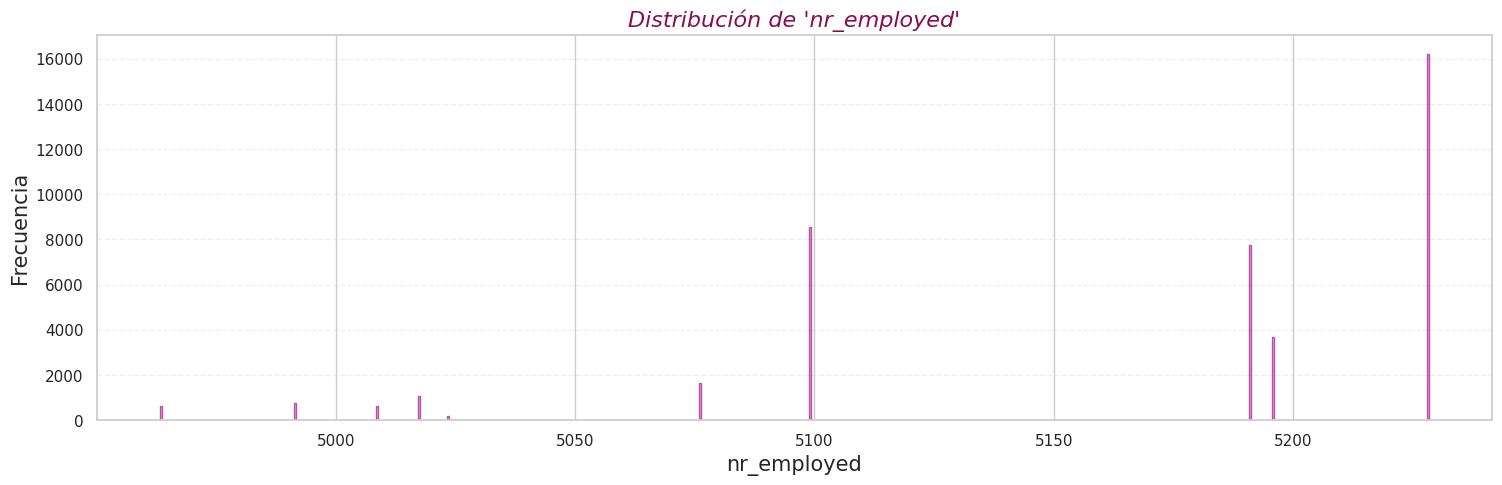

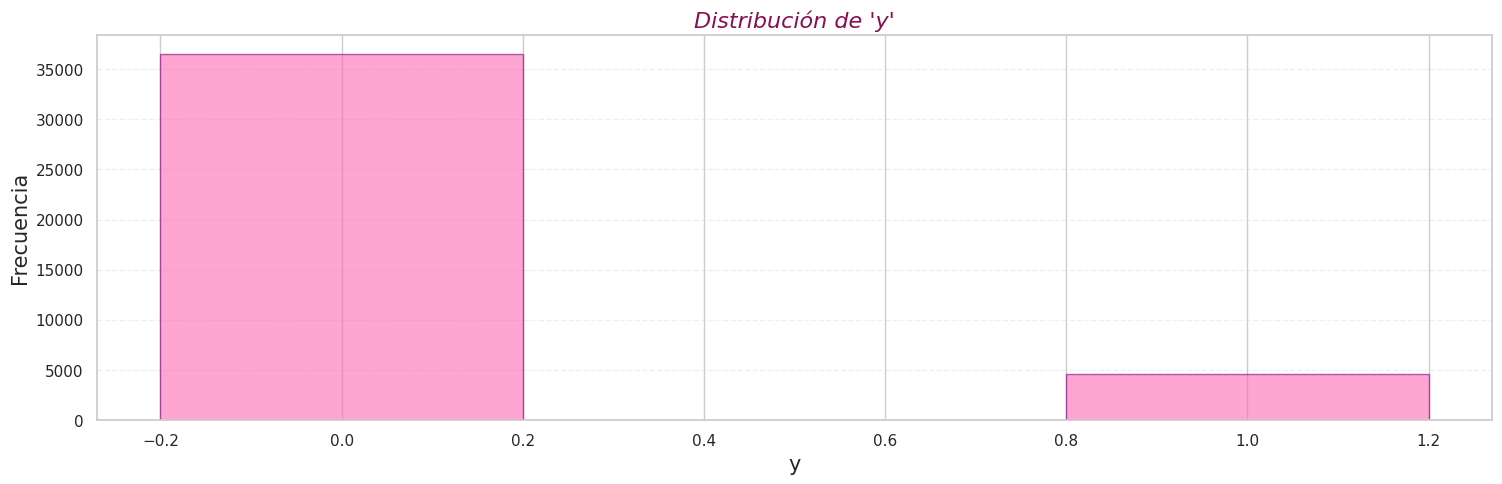

In [14]:

# Seleccionamos solo las columnas numéricas
df_numerics = df_train.select_dtypes(include = np.number)

for col in df_numerics:
    plt.figure(figsize=(18, 5))
    plt.title(f"Distribución de '{col}'", fontsize=16, fontstyle='italic', color='#880e4f') 
    
    x = df_train[col].value_counts().sort_index().index
    y = df_train[col].value_counts().sort_index().values
    
    plt.bar(x=x, height=y, width=0.4, color='hotpink', edgecolor='purple', alpha=0.6)

    plt.xlabel(col, fontsize=15)
    plt.ylabel("Frecuencia", fontsize=15)
    plt.grid(axis='y', linestyle='--', alpha=0.3) 
    plt.show()

<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <p style="color: #4a148c;">Podemos analizar el comportamiento de cada variable:</p>
    <ul style="color: #4a148c;">
        <li><b>Age:</b> Observamos una distribución que, aunque se asemeja a una campana, está desplazada hacia la izquierda. El grueso de nuestros clientes potenciales se concentra entre los <b>25 y 40 años</b>, descendiendo suavemente a medida que aumenta la edad.</li>
        
<li><b>Duration:</b> La gráfica muestra una caída exponencial. La inmensa mayoría de las llamadas son muy cortas (apenas unos segundos o pocos minutos), mientras que las llamadas largas son eventos raros (outliers) que se extienden hacia la derecha.</li>
        
<li><b>Campaign:</b> Vemos una distribución muy sesgada. Casi todos los clientes han sido contactados entre 1 y 3 veces. A partir de ahí, la frecuencia cae drásticamente, aunque aparecen casos aislados de clientes contactados más de 30 o 40 veces (posibles datos ruidosos).</li>
        
<li><b>Pdays (Días desde último contacto):</b> Esta gráfica es la más reveladora. Vemos una barra gigantesca en el valor <b>999</b>. Esto confirma visualmente que la gran mayoría de los clientes son "nuevos" (nunca contactados previamente). Los valores pequeños (contactados recientemente) son una minoría casi invisible en comparación.</li>
        
<li><b>Variables Económicas (Euribor3m, Nr.employed, etc.):</b> A diferencia de la edad, estas gráficas no son continuas, sino que muestran "bloques" o picos separados. Esto se debe a que estos índices macroeconómicos no cambian cada día, sino que se mantienen estables por temporadas, reflejando los distintos periodos en los que se realizó la campaña.</li>
    </ul>
    
<p style="color: #880e4f;"><b>Conclusión del análisis visual:</b> La presencia de escalas tan dispares (ej: edad vs euribor) y distribuciones sesgadas (ej: duration) confirma la necesidad de realizar un <b>escalado de datos</b> antes de entrenar el modelo.</p>
</div>

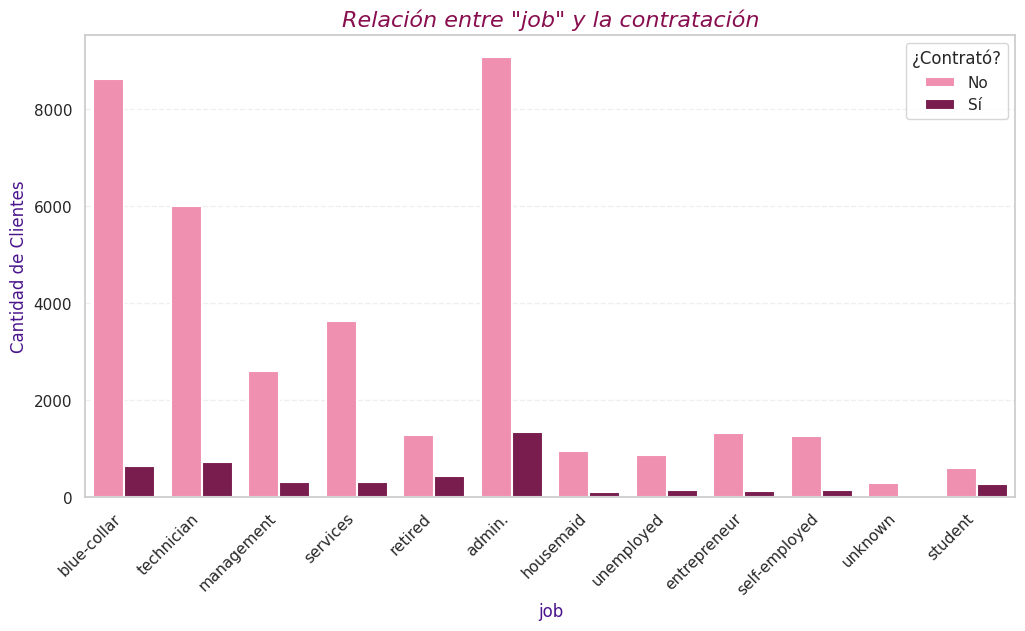

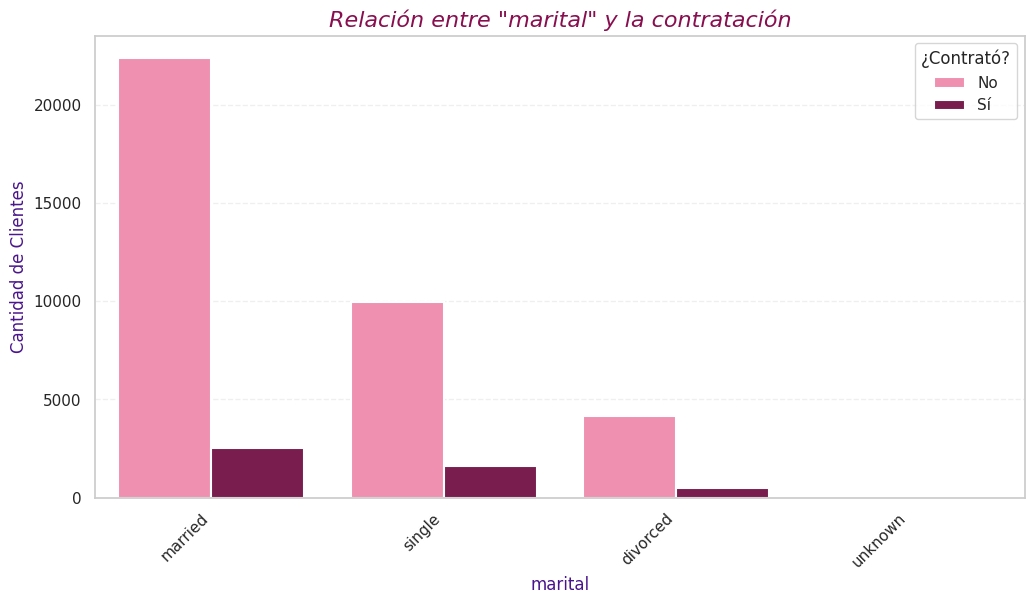

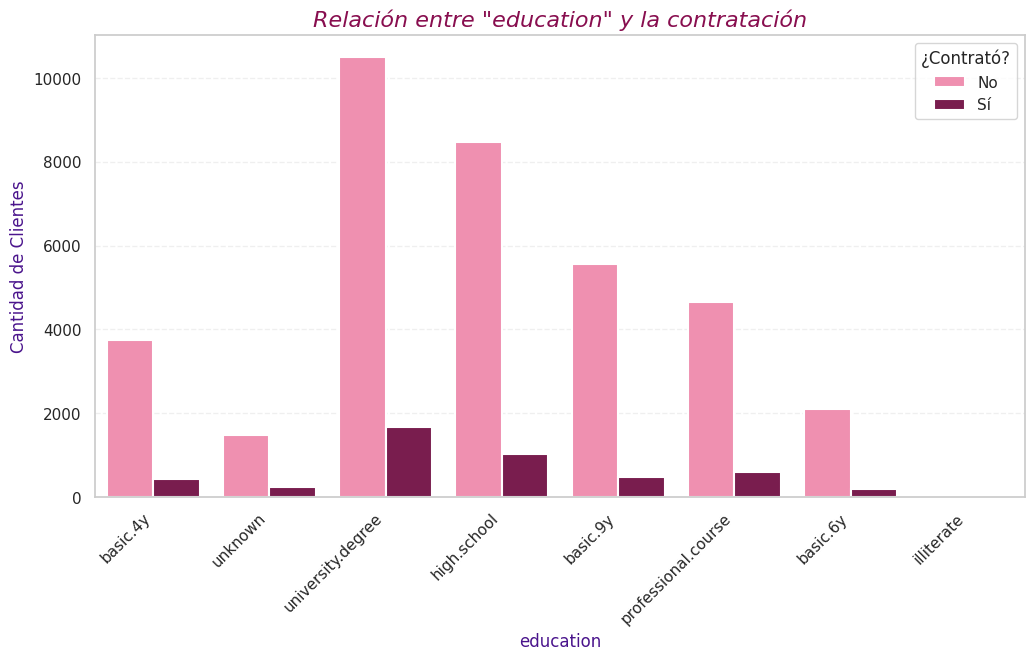

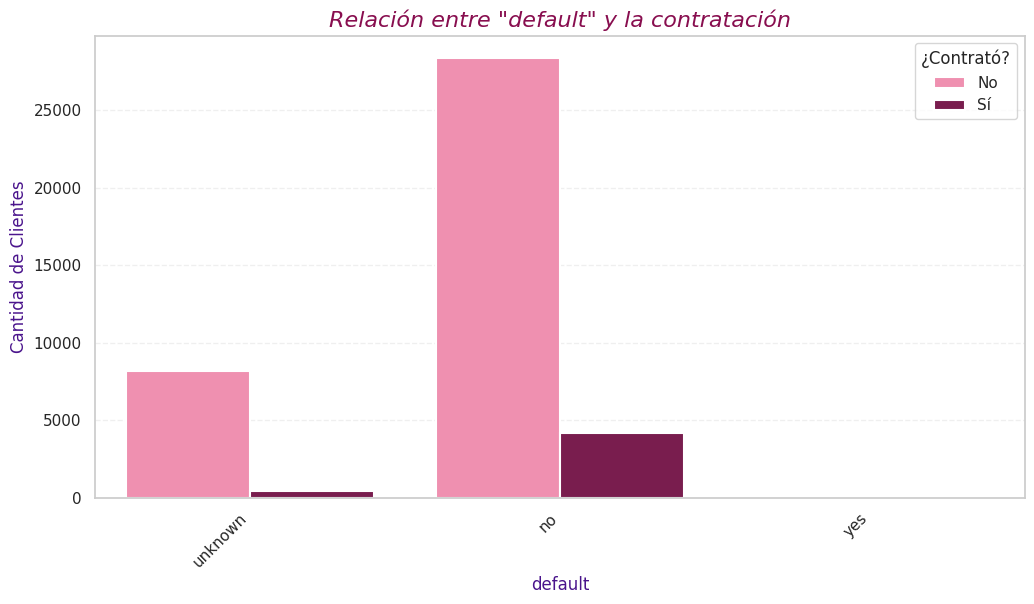

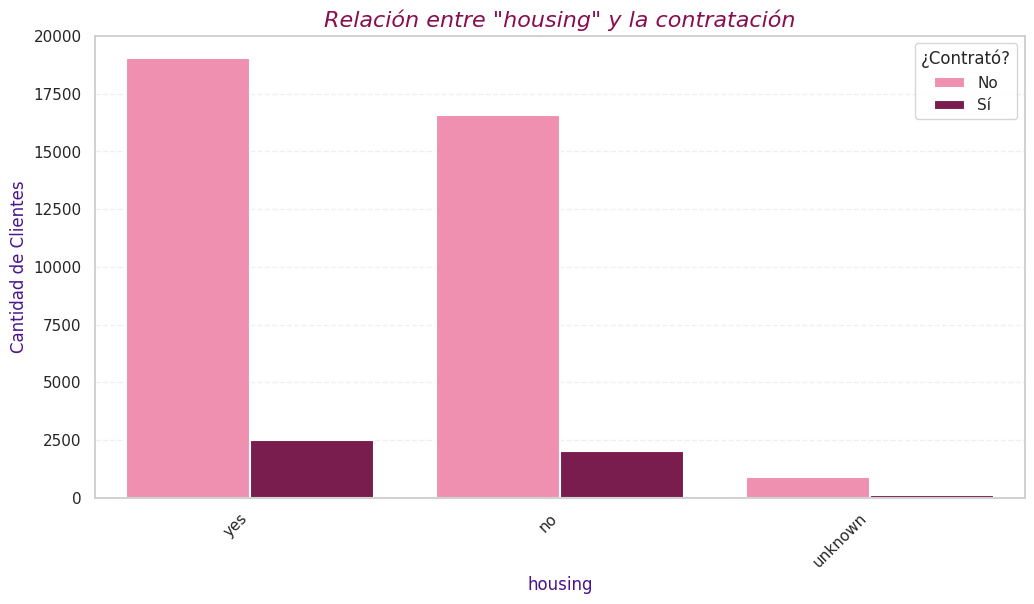

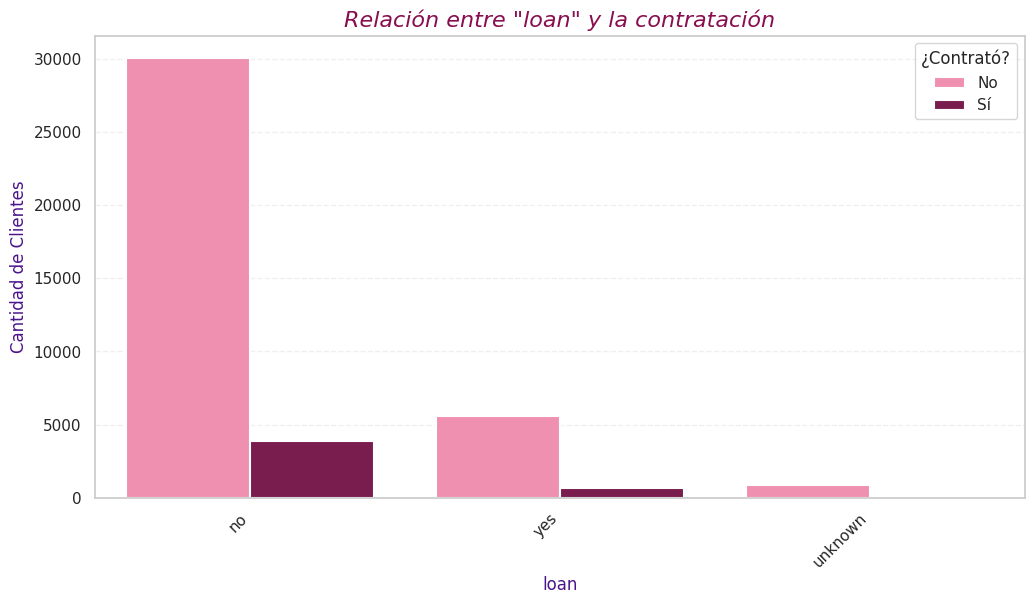

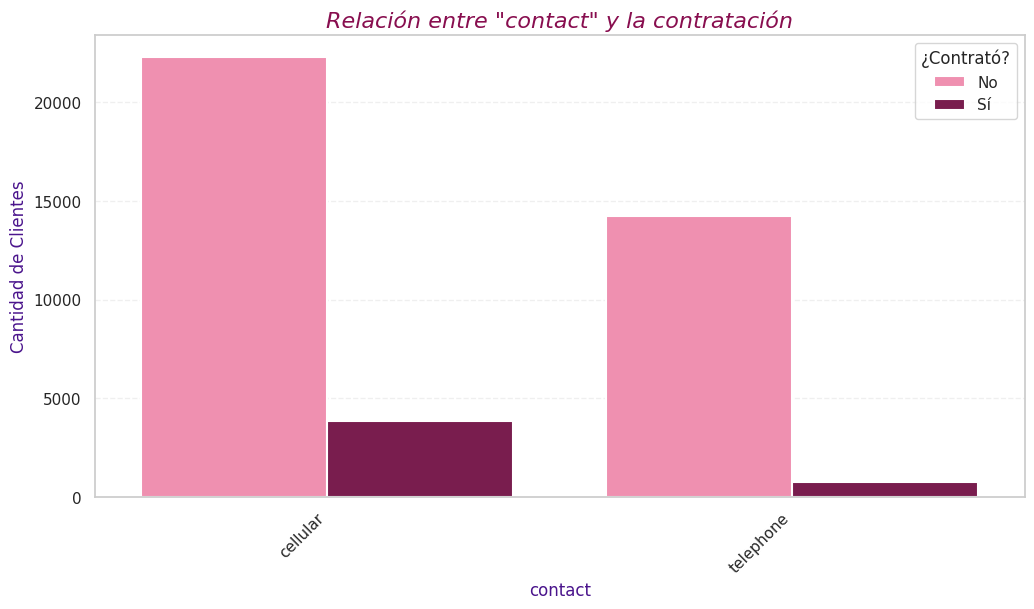

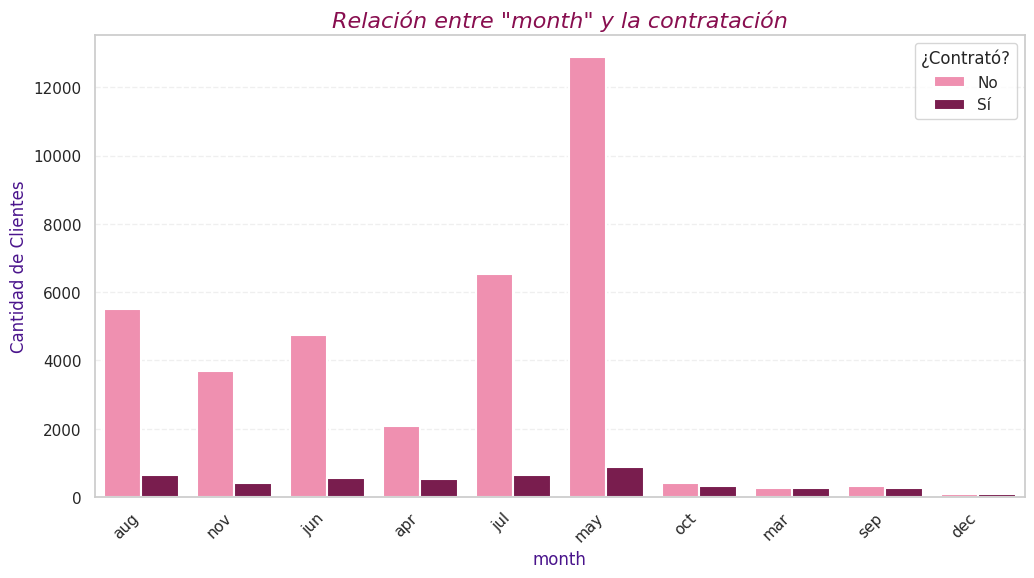

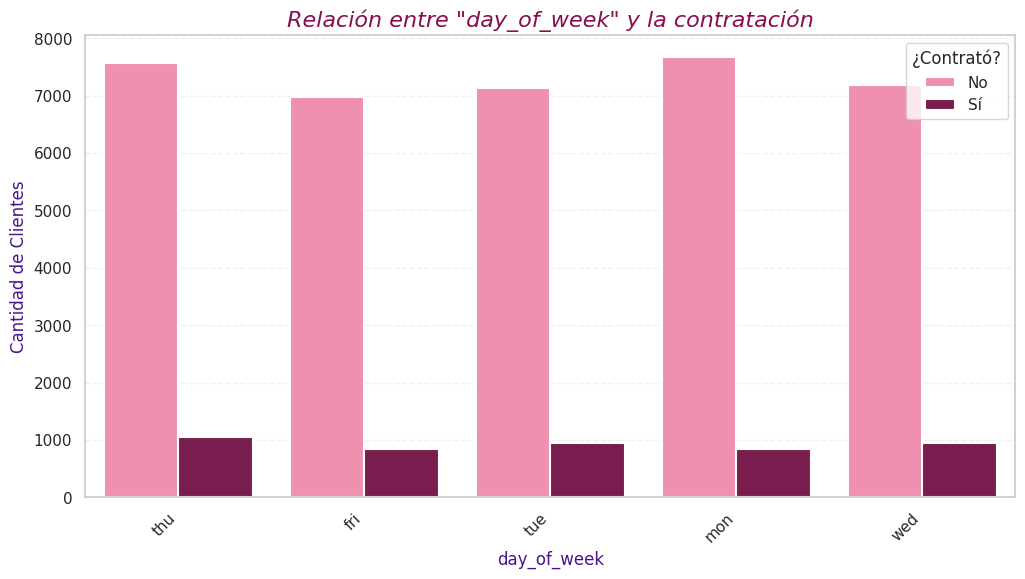

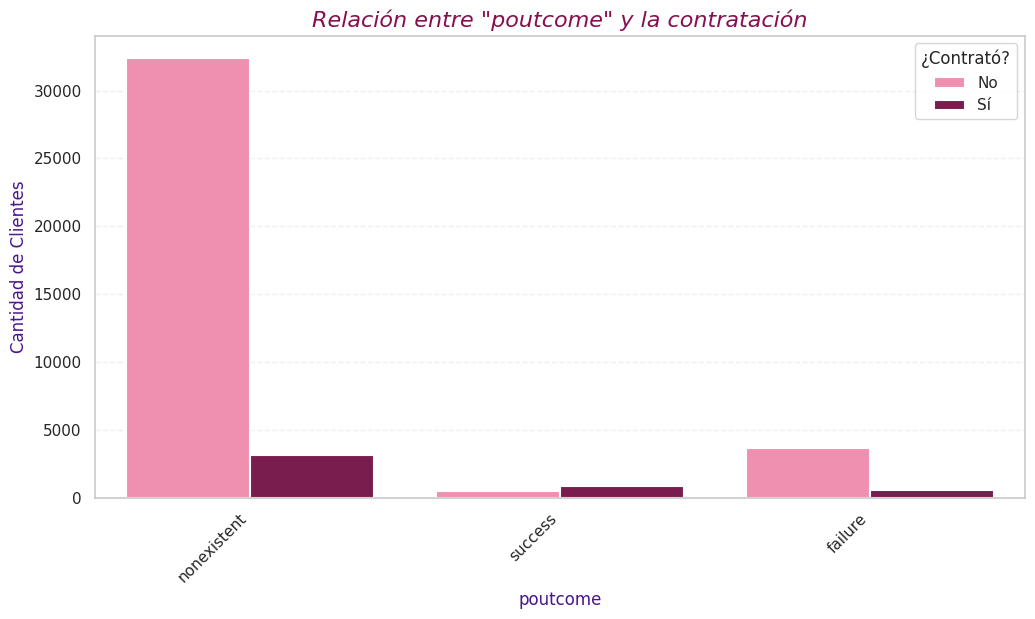

In [15]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns

colores_rositas = ["#ff80ab", "#880e4f"] 
sns.set_palette(sns.color_palette(colores_rositas))

for var in cat_cols:
    plt.figure(figsize=(12, 6))
    
    sns.countplot(x=var, hue='y', data=df_train, edgecolor='white', linewidth=1.5)
    
    plt.title(f'Relación entre "{var}" y la contratación', fontsize=16, color='#880e4f', fontstyle='italic')
    plt.xlabel(var, fontsize=12, color='#4a148c')
    plt.ylabel('Cantidad de Clientes', fontsize=12, color='#4a148c')
    plt.xticks(rotation=45, ha='right') 
    plt.legend(title='¿Contrató?', labels=['No', 'Sí'])
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.show()

<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <h3 style="color: #880e4f;">Análisis de Variables Categóricas</h3>
    <p style="color: #4a148c;">Al cruzar las variables cualitativas con nuestra variable objetivo (hue), descubrimos patrones de comportamiento:</p>
    
<ul style="color: #4a148c;">
        <li><b>Job:</b> Aunque los administrativos son los que más llaman, proporcionalmente los <b>estudiantes</b> y los <b>jubilados (retired)</b> son los que más dicen que "SÍ" (las barras moradas son más altas en proporción a las rosas). Esto nos dice que son grupos con mayor interés.</li>
        
<li><b>Contact:</b> Se ve claramente que las llamadas a <b>celular</b> tienen mucho más éxito que a fijos. El contacto por fijo es casi una pérdida de tiempo.</li>
        
<li><b>Month:</b> Vemos estacionalidad. Meses como <b>mayo</b> tienen muchísimas llamadas pero muchísimos rechazos. En cambio, meses como marzo, septiembre u octubre parecen tener mejor tasa de éxito relativo.</li>
        
<li><b>Poutcome (Resultado anterior):</b>  Si el resultado de la campaña anterior fue <b>success</b> (éxito), la barra morada es enorme. Es decir, si un cliente ya compró una vez, es muy probable que vuelva a comprar.</li>
    </ul>
</div>

In [16]:
# --- SELECCIÓN DE VARIABLES (FEATURE SELECTION) ---

# Eliminamos variables que causan ruido, redundancia o data leakage
cols_to_drop = ['default', 'duration', 'emp_var_rate', 'nr_employed']

# Lo aplicamos al TRAIN y al TEST 
df_train.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
df_test.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

print(f"Columnas eliminadas correctamente. Variables restantes: {df_train.shape[1]}")

Columnas eliminadas correctamente. Variables restantes: 17


<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <p style="color: #4a148c;">Tras el análisis visual, he tomado la decisión estratégica de eliminar 4 variables para mejorar el modelo:</p>
    
<ul style="color: #4a148c;">
        <li><b>Duration:</b> Como ya detectamos, provoca <i>Data Leakage</i>.</li>
        <li><b>Default (Impagos):</b> Es una variable prácticamente constante (casi nadie tiene impagos registrados). Al no tener varianza, no ayuda a diferenciar entre clientes y solo añade ruido.</li>
        <li><b>Emp_var_rate & Nr_employed:</b> Estas variables macroeconómicas tienen una correlación altísima con el <i>Euribor</i> y el <i>IPC</i>. Tenerlas todas juntas provoca <b>Multicolinealidad</b> (información redundante), lo cual marea a modelos lineales como la Regresión Logística. Nos quedamos con las más representativas y eliminamos estas dos.</li>
</ul>

</div>

In [17]:
# --- TRANSFORMACIÓN DE PDAYS ---
def convert(pdays):
    if pdays == 999:
        return 0 # 0 = No contactado previamente (Cliente Nuevo)
    else:
        return 1 # 1 = Sí fue contactado en el pasado

df_train['pdays'] = df_train['pdays'].apply(convert)

if 'pdays' in df_test.columns:
    df_test['pdays'] = df_test['pdays'].apply(convert)

print("Transformación realizada. Valores únicos en pdays:", df_train['pdays'].unique())

Transformación realizada. Valores únicos en pdays: [0 1]


<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <ul style="color: #4a148c;">
        <li><b>El Problema:</b> El valor <b>999</b> dominaba la columna. Numéricamente es un valor altísimo que distorsiona la media, pero en realidad solo significa "nunca contactado".</li>
        
<li><b>La Solución:</b> Hemos convertido la variable en <b>Binaria (0/1)</b>.
            <ul>
                <li><b>0:</b> Cliente Nuevo (Sin historial de contacto previo).</li>
                <li><b>1:</b> Cliente Recurrente (Ya fue contactado en campañas anteriores).</li>
            </ul>
        </li>
    </ul>

 <p style="color: #880e4f;"><b>Beneficio:</b> Con este cambio, el algoritmo ya no se confunde con el número 999 y puede detectar fácilmente si el hecho de haber sido contactado antes influye en la decisión final.</p>
</div>

In [18]:
# --- 1. ONE-HOT ENCODING (DUMMIES) ---
# Convertimos todas las variables de texto en columnas de 0 y 1
df_dummiesTrain = pd.get_dummies(data=df_train, drop_first=True)
df_dummiesTest = pd.get_dummies(data=df_test, drop_first=True)

# Alineamos los dos dataframes para asegurar que tienen las mismas columnas
# (Si falta alguna columna en uno, la rellena con 0)
df_dummiesTrain, df_dummiesTest = df_dummiesTrain.align(df_dummiesTest, join='outer', axis=1, fill_value=0)

# --- 2. DEFINICIÓN DE X e Y ---
X = df_dummiesTrain.drop('y', axis=1)
y = df_dummiesTrain['y']

# --- 3. SPLIT (DIVISIÓN DE DATOS) ---
# Separamos el 30% para testear nosotros mismos antes de la validación final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# --- 4. ESCALADO (MINMAXSCALER) ---
scaler = MinMaxScaler()

# Aprendemos del train y transformamos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_final_test = df_dummiesTest.drop('y', axis=1)
X_final_test_scaled = scaler.transform(X_final_test)

print(f"Datos preparados para entrenamiento (Train): {X_train.shape}")
print(f"Datos preparados para testeo interno (Test): {X_test.shape}")

Datos preparados para entrenamiento (Train): (28823, 48)
Datos preparados para testeo interno (Test): (12353, 48)


<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <h3 style="color: #880e4f;">Preparación Final: Encoding y Escalado</h3>
    <p style="color: #4a148c;">En esta fase final del preprocesado, convertimos nuestros datos limpios en el formato matemático exacto que necesitan los modelos:</p>
    
<ul style="color: #4a148c;">
        <li><b>One-Hot Encoding (Dummies):</b> Transformamos todas las variables categóricas en binarias (0 y 1). Usamos <i>drop_first=True</i> para evitar redundancia (si no es A ni B, ya sabemos que es C).</li>
        
<li><b>Train-Test Split (70/30):</b> 
            Hemos reservado un <b>30%</b> de nuestros datos de entrenamiento para validar internamente los modelos. 
            <br><i>Detalle importante:</i> Hemos separado la variable objetivo <b>'y'</b> de las variables predictoras <b>'X'</b> para asegurar que el entrenamiento sea honesto y sin fugas de información.
        </li>
        
<li><b>Escalado (MinMaxScaler):</b>
            Siguiendo la estrategia de normalización, comprimimos todos los valores en un rango de <b>[0, 1]</b>. Esto es vital para que el KNN mida las distancias correctamente y ninguna variable domine sobre otra por tener cifras más altas.
        </li>
    </ul>
</div>

---------

## 4. Creación del modelo y división del dataset

<div style="background-color: #c4abe7ff; border-left: 5px solid #c42ab5ff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #880e4f;"> K-Nearest Neighbors (KNN)</h2>
</div>

------------------------------
EL GANADOR ES K = 7
F1-Score conseguido: 0.3162
Accuracy conseguido: 0.8943
------------------------------


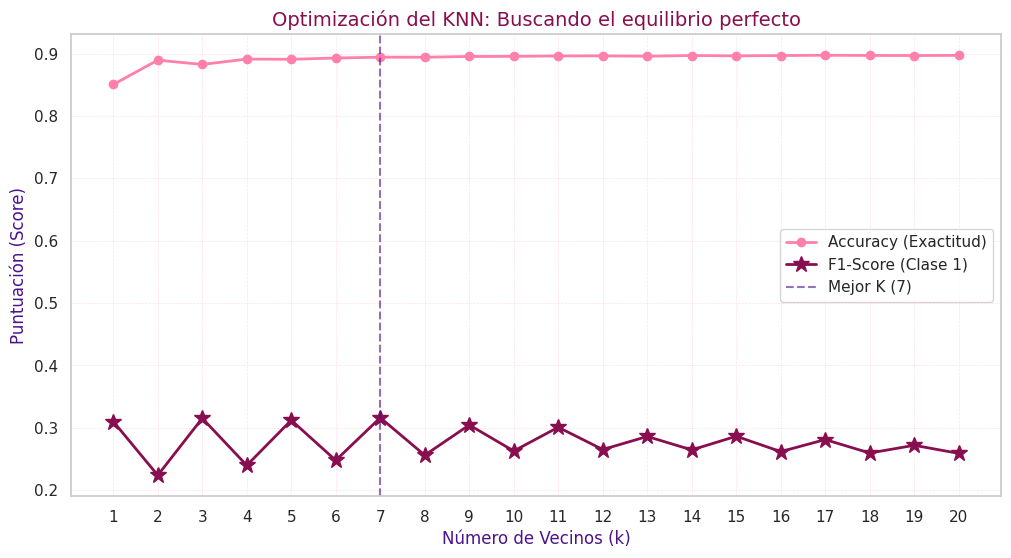

In [19]:

# Definimos el rango de vecinos a probar (del 1 al 20)
rango_k = range(1, 21)
historial_metricas = []

for k in rango_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1] 
    
    # Calculamos las notas del modelo
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = log_loss(y_test, y_prob)
    
    # Guardamos en nuestra lista
    historial_metricas.append({
        'k': k, 
        'accuracy': acc, 
        'f1': f1, 
        'loss': loss
    })

# Buscamos cuál fue el mejor K basándonos en el F1-Score
mejor_resultado = max(historial_metricas, key=lambda x: x['f1'])
mejor_k = mejor_resultado['k']

print("-" * 30)
print(f"EL GANADOR ES K = {mejor_k}")
print(f"F1-Score conseguido: {mejor_resultado['f1']:.4f}")
print(f"Accuracy conseguido: {mejor_resultado['accuracy']:.4f}")
print("-" * 30)

ks = [r['k'] for r in historial_metricas]
accs = [r['accuracy'] for r in historial_metricas]
f1s = [r['f1'] for r in historial_metricas]

plt.figure(figsize=(12, 6))

plt.plot(ks, accs, marker='o', color='#ff80ab', label='Accuracy (Exactitud)', linewidth=2)

plt.plot(ks, f1s, marker='*', markersize=12, color='#880e4f', label='F1-Score (Clase 1)', linewidth=2)

plt.axvline(x=mejor_k, color='#4a148c', linestyle='--', alpha=0.6, label=f'Mejor K ({mejor_k})')

plt.title('Optimización del KNN: Buscando el equilibrio perfecto', fontsize=14, color='#880e4f')
plt.xlabel('Número de Vecinos (k)', color='#4a148c', fontsize=12)
plt.ylabel('Puntuación (Score)', color='#4a148c', fontsize=12)
plt.xticks(rango_k)
plt.legend()
plt.grid(color='pink', linestyle='--', linewidth=0.5, alpha=0.5) # Rejilla rosita
plt.show()

<div style="background-color: #fce4ec; border-left: 5px solid #f06292; padding: 15px; border-radius: 5px;">
    <h3 style="color: #880e4f;">Análisis de los Resultados (K=7)</h3>
    <p style="color: #4a148c;">Tras realizar el barrido de hiperparámetros, nuestro algoritmo ha seleccionado <b>K=7</b> como el número óptimo de vecinos. Analicemos las métricas obtenidas:</p>
    
<ul style="color: #4a148c;">
        <li><b>Accuracy (89.4%):</b> 
            A primera vista parece un modelo casi perfecto. Sin embargo, este número es engañoso. Como el 89% de los clientes dicen "No", el modelo acierta mucho</li>
            
<li><b>LF1-Score (31.6%):</b> 
            Este valor es nuestra brújula real. Al haber eliminado la variable <i>'duration'</i> para evitar el <i>data leakage</i>, el modelo tiene que esforzarse más para encontrar a los clientes interesados basándose solo en su perfil (edad, trabajo, economía). Un 0.31 es un valor honesto que indica capacidad de detección sin hacer trampas.</li>
            
<li><b>¿Por qué K=7?</b> 
            Un número impar evita empates en las votaciones. Al ser un número bajo (pero no 1), el modelo es capaz de captar detalles locales sin caer en el overfitting.</li>
    </ul>

</div>

In [20]:
model_knn = KNeighborsClassifier(n_neighbors=mejor_k) 


<div style="background-color: #e7abc1ff; border-left: 5px solid #c1297fff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #880e4f;"> LOGISTIC REGRESSION</h2>
</div>

In [21]:
model_lr = LogisticRegression(penalty='l2')

<div style="background-color: #b69ae0ff; border-left: 5px solid #7d25afff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #9f4475ff;"> RANDOM FOREST</h2>
</div>

In [22]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    
    max_depth=10,         # Limitamos la altura
    min_samples_leaf=5,   # Exigimos al menos 5 personas por grupo final
    min_samples_split=10, # Exigimos 10 personas para poder dividir
    
    random_state=42
)

--------

## 5. Entrenamiento

In [23]:

model_knn.fit(X_train, y_train)


,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
model_lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:

model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Importante entrenar sobre el mismo el split si no podríamos comparar cual es el mejor

----------

## 6. Análisis de resultados

<div style="background-color: #c4abe7ff; border-left: 5px solid #c42ab5ff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #880e4f;">KNN</h2>
</div>

CLASIFICACIÓN - KNN
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10961
           1       0.58      0.22      0.32      1392

    accuracy                           0.89     12353
   macro avg       0.75      0.60      0.63     12353
weighted avg       0.87      0.89      0.87     12353



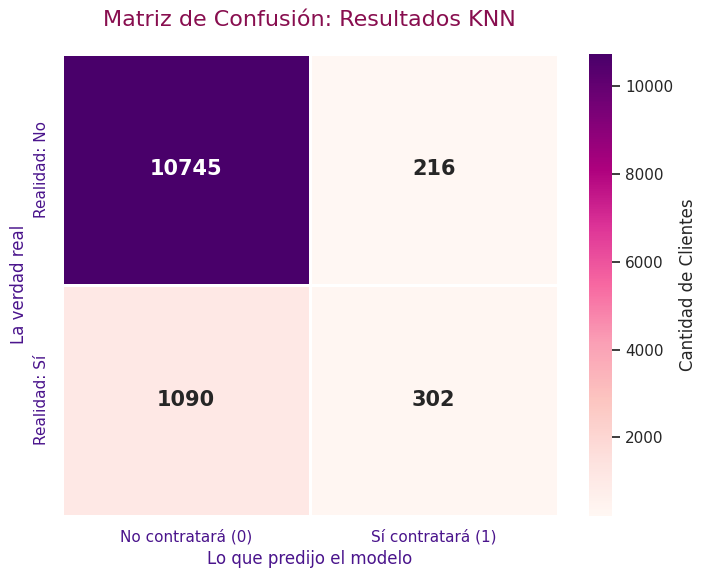

In [26]:
predknn = model_knn.predict(X_test)

print("CLASIFICACIÓN - KNN")
print(classification_report(y_test, predknn))

cmknn = confusion_matrix(y_test, predknn)

plt.figure(figsize=(8, 6))

sns.heatmap(cmknn, annot=True, fmt='d', 
            xticklabels=['No contratará (0)', 'Sí contratará (1)'], 
            yticklabels=['Realidad: No', 'Realidad: Sí'],
            cmap='RdPu', 
            linewidths=2, linecolor='white', 
            annot_kws={"size": 15, "weight": "bold"},
            cbar_kws={'label': 'Cantidad de Clientes'})

plt.title('Matriz de Confusión: Resultados KNN', fontsize=16, color='#880e4f', pad=20)
plt.xlabel('Lo que predijo el modelo', fontsize=12, color='#4a148c')
plt.ylabel('La verdad real', fontsize=12, color='#4a148c')
plt.xticks(color='#4a148c')
plt.yticks(color='#4a148c')

plt.show()

<div style="background-color: #f3e5f5; border-left: 5px solid #9c27b0; padding: 15px; border-radius: 5px;">
    <h3 style="color: #6a1b9a;">Resultados: KNN (K=7)</h3>
    <p style="color: #4a148c;">Analizando las métricas obtenidas en el reporte de clasificación:</p>
    
<ul style="color: #4a148c;">
        <li><b>Exactitud Global (Accuracy 89%):</b> 
            El modelo parece tener una nota excelente (un 8,9 sobre 10). Sin embargo, esto se debe a que la clase 0 ("No") es mayoritaria y el modelo la predice genial (con un <b>98% de Recall</b>). Es muy bueno diciendo quién NO va a comprar.
        </li>
        
<li><b>Precisión del 'Sí' (58%):</b> 
            Aquí está el dato interesante. Cuando el modelo se arriesga y dice "Este cliente va a comprar", acierta el <b>58%</b> de las veces. Es un modelo <b>fiable pero prudente</b>.
        </li>
        
<li><b>El punto débil (Recall 22%):</b> 
            El <i>Recall</i> de la clase 1 es bajo (0.22). Esto significa que de todos los clientes que realmente compraron, nuestro KNN solo detectó al 22%. El otro 78% se le escapó.
            <br><i>Justificación:</i> Esto ocurre porque hemos sido muy estrictos con la limpieza (quitando 'duration') para evitar trampas, haciendo que el modelo tenga que esforzarse mucho para encontrar patrones.
        </li>
    </ul>

<p style="color: #7b1fa2;"><b>Conclusión:</b> Es un modelo conservador. Ideal para filtrar listas de llamadas y asegurar que a quien llamemos tenga probabilidad de éxito, aunque perdamos volumen de clientes potenciales.</p>
</div>

<div style="background-color: #e7abc1ff; border-left: 5px solid #c1297fff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #880e4f;"> LOGISTIC REGRESSION</h2>
</div>

In [27]:
model_lr.intercept_

array([-1.93907619])

In [28]:
model_lr.coef_

array([[-0.01827187, -2.15447123,  1.16846292,  1.31782268, -0.56262338,
        -0.24602463, -0.0216278 ,  0.03820996,  0.13527866,  0.0200906 ,
        -0.05403546, -0.04944915,  0.41851711,  0.01702966,  0.0446017 ,
         0.06087621, -2.4969383 , -0.01498931, -0.06493407, -0.1931824 ,
        -0.16264886, -0.16576761, -0.03203325,  0.23237121,  0.01092148,
        -0.1347277 ,  0.22099225, -0.04699955, -0.01514734,  0.11841142,
        -0.01498931,  0.02032478,  0.03637401,  0.07081268,  0.52251075,
        -0.21445446,  0.15647166,  0.16664918,  0.11155784,  1.00113867,
        -0.62784205, -0.10617192,  0.19499792, -0.12589302,  1.01992301,
         0.44952996,  0.8115752 , -0.27850014]])

In [29]:
model_lr.score(X_test, y_test)

0.8983242936938396

CLASIFICACIÓN - LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.65      0.22      0.32      1392

    accuracy                           0.90     12353
   macro avg       0.78      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



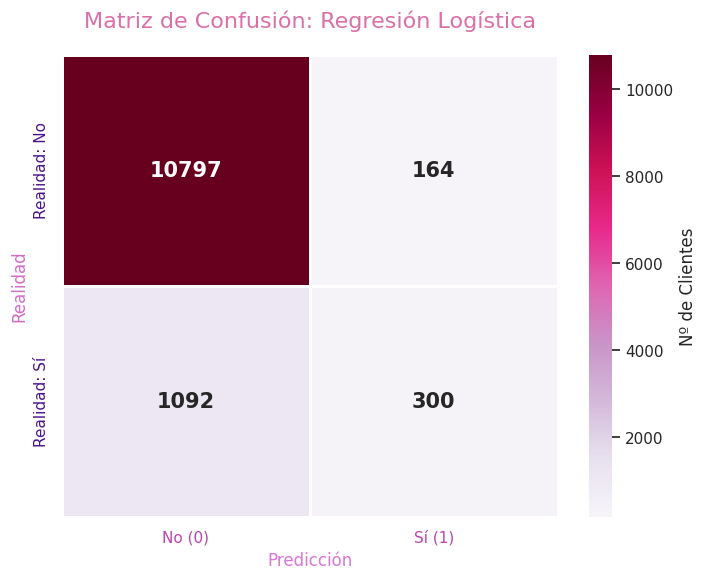

In [30]:
y_pred_lr = model_lr.predict(X_test)

print("CLASIFICACIÓN - LOGISTIC REGRESSION")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))

sns.heatmap(cm_lr, annot=True, fmt='d', 
            xticklabels=['No (0)', 'Sí (1)'], 
            yticklabels=['Realidad: No', 'Realidad: Sí'],
            cmap='PuRd', 
            linewidths=2, linecolor='white',
            annot_kws={"size": 15, "weight": "bold"},
            cbar_kws={'label': 'Nº de Clientes'})

plt.title('Matriz de Confusión: Regresión Logística', fontsize=16, color="#db70a9", pad=20)
plt.xlabel('Predicción', fontsize=12, color="#da76d6")
plt.ylabel('Realidad', fontsize=12, color="#d36cc6")
plt.xticks(color="#bd44ad")
plt.yticks(color='#4a148c')

plt.show()

<div style="background-color: #df9bb2ff; border-left: 5px solid #61263cff; padding: 15px; border-radius: 5px;">
    <h3 style="color: #880e4f;">Regresión Logística</h3>
    
<ul style="color: #4a148c;">
        <li><b>LPrecisión (65%):</b> 
            Mientras el KNN se quedaba en un 58%, la Regresión Logística sube al <b>65%</b>. 
            <br><i>¿Qué significa?</i> Que este modelo es más "selectivo". Cuando señala a un cliente como potencial comprador, hay una probabilidad mucho más alta de que tenga razón.
        </li>
        
<li><b>90% Accuracy:</b> 
            Sube un punto respecto al anterior. Es un modelo muy robusto que apenas comete errores con los clientes que "No" interesan (Recall del 99% en la clase negativa).
        </li>
        
<li><b>Recall 0.22:</b> 
            Seguimos teniendo el mismo desafío que con el KNN. Al haber eliminado las variables "trampa", al modelo le cuesta arriesgarse y solo detecta al 22% de los compradores reales. Es un modelo <b>de bajo riesgo</b>: prefiere perder una oportunidad antes que equivocarse.
        </li>
    </ul>
</div>

<div style="background-color: #b69ae0ff; border-left: 5px solid #7d25afff; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
    <h4 style="color: #9f4475ff;"> RANDOM FOREST</h2>
</div>

Visualizando la lógica del Bosque...


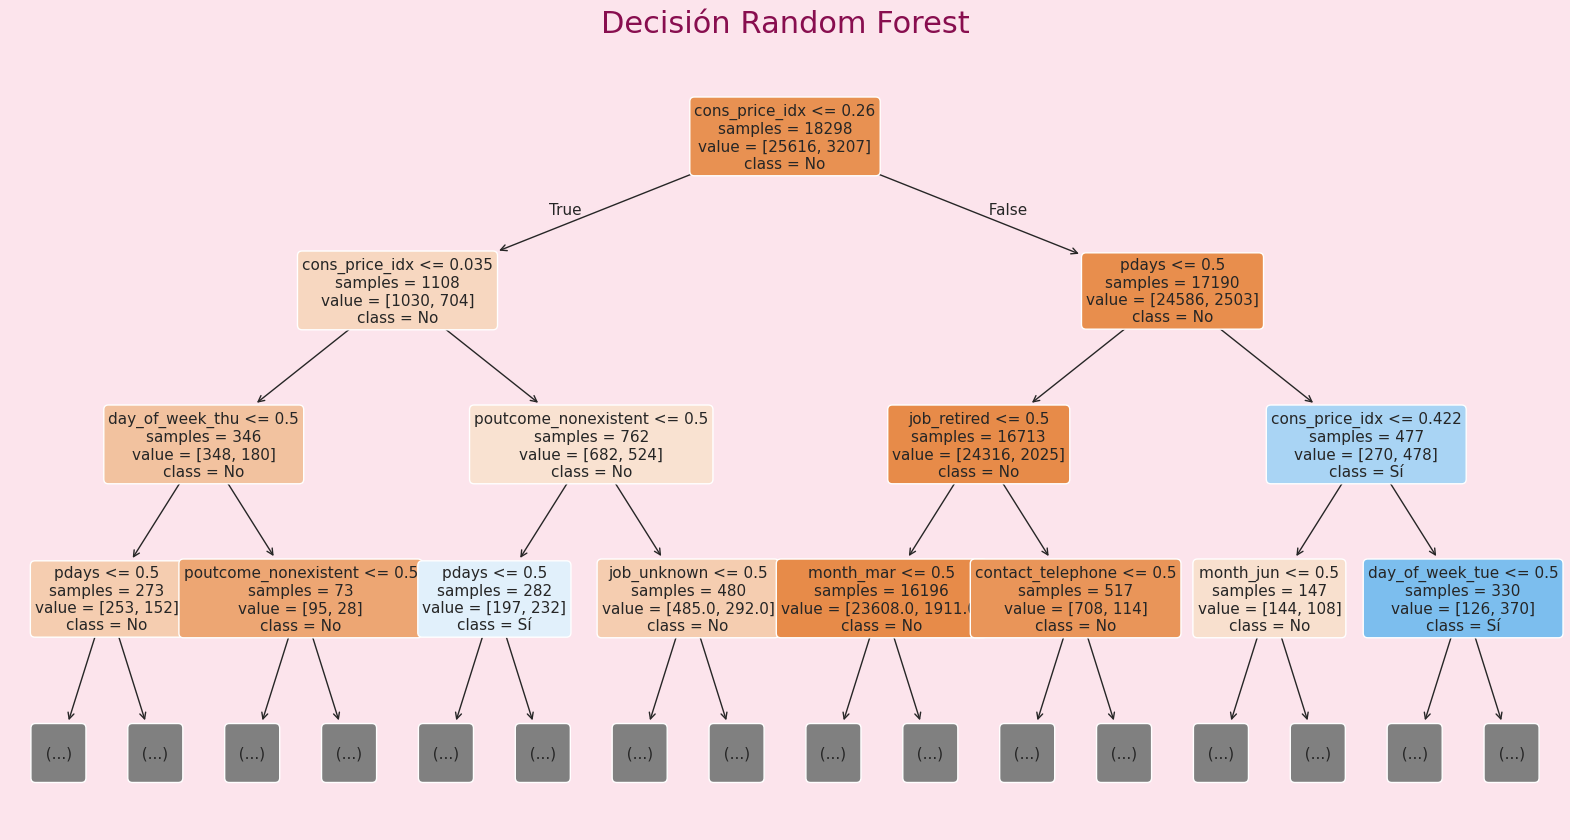

------------------------------
RENDIMIENTO DEL MODELO
------------------------------
Precisión en entrenamiento (Train): 0.905
Precisión en evaluación (Test): 0.899
------------------------------


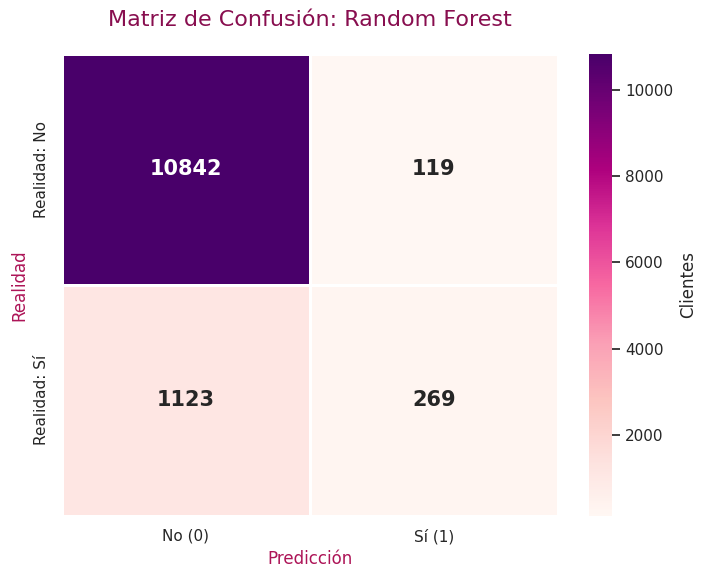

In [31]:
feature_names = X.columns.tolist()
class_names = ['No', 'Sí']

plt.figure(figsize=(20, 10), facecolor='#fce4ec') 

print("Visualizando la lógica del Bosque...")

plot_tree(model_rf.estimators_[0], 
        feature_names=feature_names,
        class_names=class_names,
        filled=True, 
        impurity=False, 
        fontsize=11, 
        rounded=True,
        max_depth=3) # Solo 3 niveles para que sea vea

plt.title("Decisión Random Forest", fontsize=22, color='#880e4f', pad=20)
plt.show()

print("-" * 30)
print("RENDIMIENTO DEL MODELO")
print("-" * 30)
print("Precisión en entrenamiento (Train): {:.3f}".format(model_rf.score(X_train, y_train)))
print("Precisión en evaluación (Test): {:.3f}".format(model_rf.score(X_test, y_test)))
print("-" * 30)

cm_rf = confusion_matrix(y_test, model_rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', 
        xticklabels=['No (0)', 'Sí (1)'], 
        yticklabels=['Realidad: No', 'Realidad: Sí'],
        cmap='RdPu', 
        linewidths=2, linecolor='white',
        annot_kws={"size": 15, "weight": "bold"},
        cbar_kws={'label': 'Clientes'})

plt.title('Matriz de Confusión: Random Forest', fontsize=16, color='#880e4f', pad=20)
plt.xlabel('Predicción', fontsize=12, color='#ad1457')
plt.ylabel('Realidad', fontsize=12, color='#ad1457')
plt.show()

<div style="background-color: #f3e5f5; border-left: 5px solid #ab47bc; padding: 15px; border-radius: 5px;">
    <h3 style="color: #6a1b9a;">Overfitting (Ajuste de Hiperparámetros)</h3>
    <p style="color: #4a148c;">
        Al ver que mi primer modelo sacaba casi un 100% en el entrenamiento,y para solucionarlo, <b>he estado modificando varias veces los hiperparámetros</b> manualmente hasta dar con un mejor modelo
    </p>
    
<ul style="color: #4a148c;">
        <li><b>El proceso:</b> Fui probando distintos valores para limitar la profundidad del árbol (<i>max_depth</i>) y exigir más datos por hoja. Al principio me pasé frenándolo y bajaba mucho el acierto, pero tras varios intentos encontré el equilibrio.</li>
         
<li><b>El resultado final:</b> He conseguido bajar esa nota de entrenamiento del 99% al 90%. Aunque parezca que el modelo es "peor", en realidad ahora es <b>más honesto</b>. La diferencia entre el Train y el Test es mínima, lo que me confirma que ya no hay overfitting.</li>
</ul>

<p style="color: #7b1fa2;"><b>Conclusión:</b> Ahora tengo un modelo estable que funciona igual de bien con datos conocidos que con datos nuevos.</p>
</div>

----------

## 7. Realización de predicciones

TABLA RESUMEN DE PRECISIONES (ACCURACY)
------------------------------------------------------------
                     Train (Entrenamiento)  Test (Validación)
Modelo                                                       
KNN (K=7)                         0.908094           0.894277
Regresión Logística               0.900600           0.898324
Random Forest                     0.905457           0.899458
------------------------------------------------------------


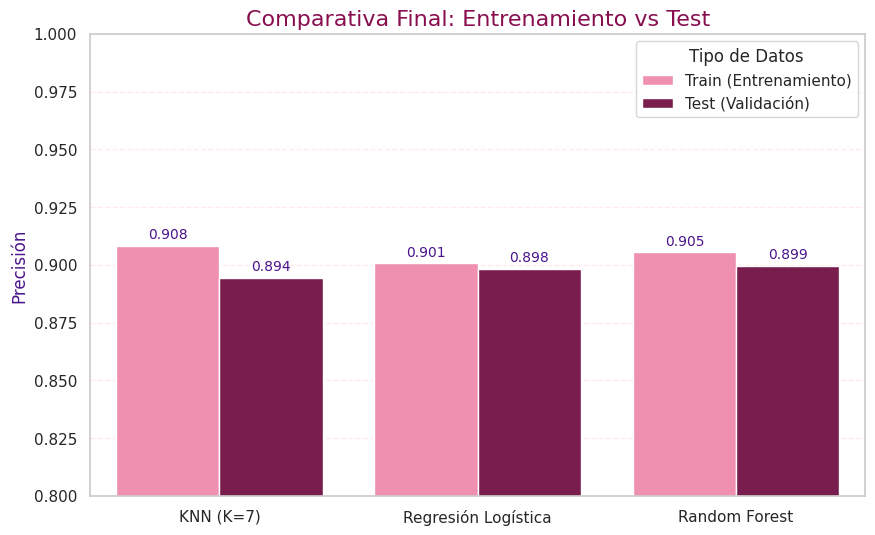

In [32]:

# --- 1. CREACIÓN DE LA TABLA DE DATOS ---
# Recopilamos los scores en un diccionario organizado
resultados = {
    'Modelo': ['KNN (K=7)', 'Regresión Logística', 'Random Forest'],
    
    'Train (Entrenamiento)': [
        model_knn.score(X_train, y_train),
        model_lr.score(X_train, y_train),
        model_rf.score(X_train, y_train)
    ],
    
    'Test (Validación)': [
        model_knn.score(X_test, y_test),
        model_lr.score(X_test, y_test),
        model_rf.score(X_test, y_test)
    ]
}

# Convertimos a DataFrame
df_res = pd.DataFrame(resultados)
df_res.set_index('Modelo', inplace=True) 

print("TABLA RESUMEN DE PRECISIONES (ACCURACY)")
print("-" * 60)
print(df_res)
print("-" * 60)

df_long = df_res.reset_index().melt(id_vars='Modelo', var_name='Set', value_name='Accuracy')

plt.figure(figsize=(10, 6))

sns.barplot(data=df_long, x='Modelo', y='Accuracy', hue='Set', palette=['#ff80ab', '#880e4f'], edgecolor='white')

plt.title('Comparativa Final: Entrenamiento vs Test', fontsize=16, color='#880e4f')
plt.ylim(0.80, 1.0) 
plt.ylabel('Precisión', color='#4a148c')
plt.xlabel('')
plt.legend(title='Tipo de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='pink')

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=10, color='#4a148c')

plt.show()

<div style="background-color: #fce4ec; border-left: 5px solid #c2185b; padding: 15px; border-radius: 5px;">
    <p style="color: #4a148c;">Tras comparar los tres modelos y realizar los ajustes necesarios:</p>
    <ul style="color: #4a148c;">
        <li><b>1. Random Forest (89.95%)</b><br>
        Ha conseguido la nota más alta en el conjunto de Test. Gracias a la poda (limitar la profundidad), hemos logrado que su precisión en entrenamiento (0.905) y en test (0.899) sean casi idénticas. Esto demuestra que es un modelo <b>robusto, estable y sin overfitting</b>.</li>
        <li><b>2. Regresión Logística (89.83%)</b><br>
        Es un modelo bueno (la diferencia entre train y test es casi nula). Si buscásemos simplicidad matemática, este sería el elegido.</li>
        <li><b>3. KNN (89.42%)</b><br>
        Aunque es un buen modelo, se queda un poco atrás comparado con la potencia de los otros dos. Le cuesta más generalizar sin aprenderse los datos de memoria.</li>
    </ul>
</div>

------------

## 8. Visualización

--------------------------------------------------
RESUMEN DE PREDICCIONES (CLIENTES POTENCIALES)
--------------------------------------------------
🔹 KNN (K=7): Detecta 168 clientes (4.10%)
🔹 Regresión Logística: Detecta 167 clientes (4.05%)
🔹 Random Forest (Opt.): Detecta 142 clientes (3.47%)
--------------------------------------------------


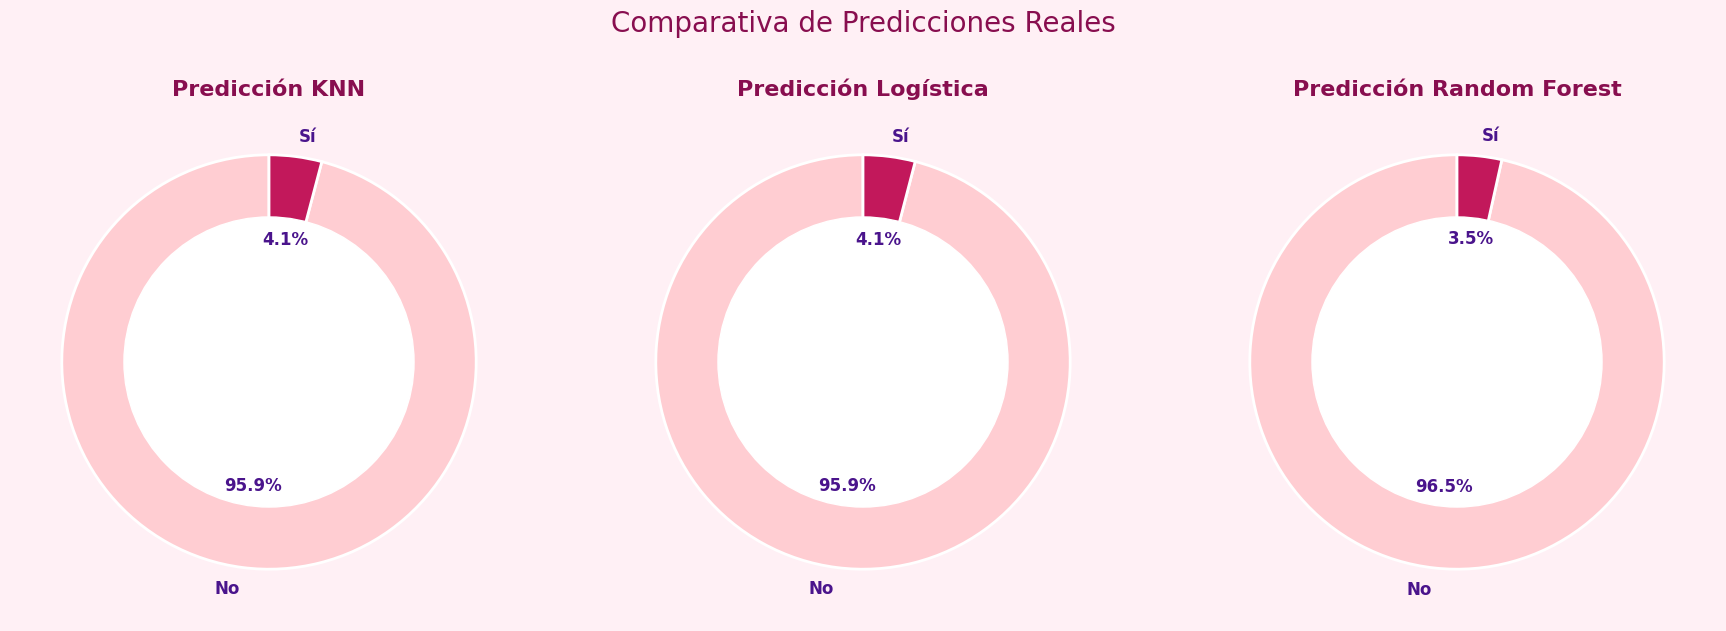

In [33]:

pred_knn = model_knn.predict(X_final_test_scaled)
pred_lr = model_lr.predict(X_final_test_scaled)
pred_rf = model_rf.predict(X_final_test_scaled)

# 2. Calculamos los porcentajes de éxito de cada uno
tasas_exito = {
    'KNN (K=7)': pred_knn.mean() * 100,
    'Regresión Logística': pred_lr.mean() * 100,
    'Random Forest (Opt.)': pred_rf.mean() * 100
}

print("-" * 50)
print("RESUMEN DE PREDICCIONES (CLIENTES POTENCIALES)")
print("-" * 50)
for modelo, tasa in tasas_exito.items():
    n_clientes = int(tasa * len(pred_knn) / 100)
    print(f"🔹 {modelo}: Detecta {n_clientes} clientes ({tasa:.2f}%)")
print("-" * 50)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('#fff0f5') 

colores = ['#ffcdd2', '#c2185b'] 

modelos_lista = [
    ('KNN', pred_knn), 
    ('Logística', pred_lr), 
    ('Random Forest', pred_rf)
]

for i, (nombre, preds) in enumerate(modelos_lista):
    conteos = pd.Series(preds).value_counts().sort_index()
    labels = ['No', 'Sí']
    
    ax[i].pie(conteos, labels=labels, autopct='%1.1f%%', startangle=90, 
            colors=colores, textprops={'fontsize': 12, 'color': '#4a148c', 'weight': 'bold'},
            wedgeprops={'edgecolor': 'white', 'linewidth': 2})
    
    circulo = plt.Circle((0,0), 0.70, fc='white')
    ax[i].add_artist(circulo)
    
    ax[i].set_title(f'Predicción {nombre}', fontsize=16, color='#880e4f', weight='bold')

plt.suptitle('Comparativa de Predicciones Reales', fontsize=20, color='#880e4f', y=1.05)
plt.tight_layout()
plt.show()

<div style="background-color: #ee8bacff; border-left: 5px solid #d342c7ff; padding: 15px; border-radius: 5px;">
    <p style="color: #4a148c;">Los resultados finales nos muestran dos estrategias de negocio muy claras:</p>
    
<ul style="color: #4a148c;">
        <li><b>Los Optimistas (KNN y Regresión Logística):</b> 
            Ambos modelos coinciden casi exactamente (168 y 167 clientes, un <b>4.10%</b>). 
            <br><i>Ventaja:</i> Si el banco quiere "pescar con red grande" y no le importa hacer algunas llamadas extra, estos modelos ofrecen una lista más amplia de clientes potenciales.
        </li>
        
<li><b>El Selectivo (Random Forest Optimizado):</b> 
            Este modelo ha sido el más estricto, seleccionando solo a 142 clientes (<b>3.47%</b>).
            <br><i>La clave:</i> Al haber aplicado la "poda" (evitar overfitting), este modelo ha descartado a clientes dudosos que los otros sí aceptaron. <b>Es la lista "VIP"</b>: menos clientes, pero con mayor probabilidad real de compra.
        </li>
    </ul>

</div>

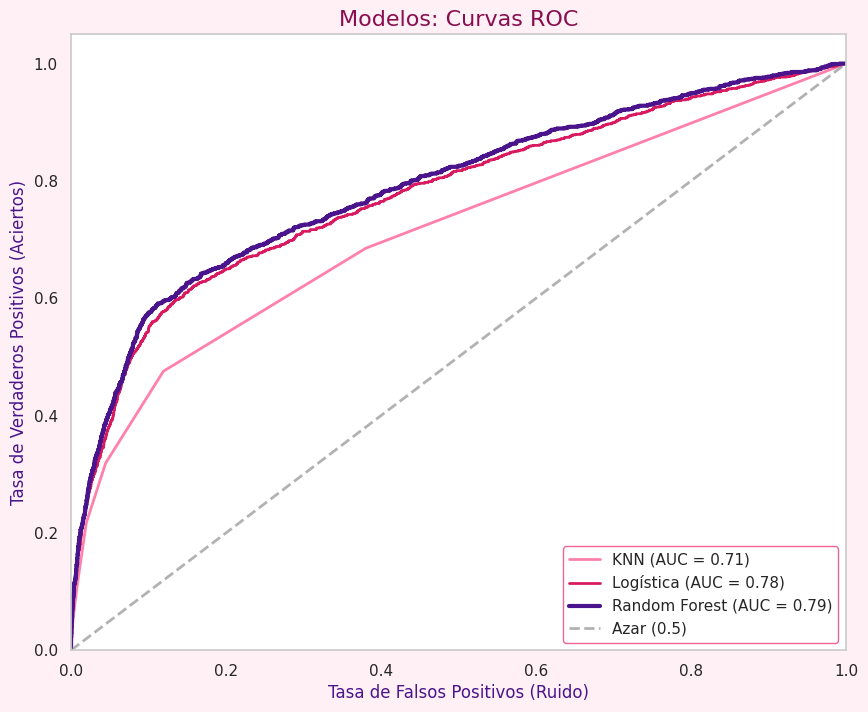

In [34]:



plt.figure(figsize=(10, 8), facecolor='#fff0f5') 
plt.grid(color='white', linestyle='-', linewidth=1) 

# --- MODELO 1: KNN ---
probs_knn = model_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='#ff80ab', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# --- MODELO 2: Regresión Logística ---
probs_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='#d81b60', lw=2, label=f'Logística (AUC = {roc_auc_lr:.2f})')

# --- MODELO 3: Random Forest (Optimizado) ---
probs_rf = model_rf.predict_proba(X_test)[:, 1] 
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='#4a148c', lw=3, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# --- LÍNEA BASE (El azar) ---
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', alpha=0.6, label='Azar (0.5)')

# Decoración
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (Ruido)', fontsize=12, color='#4a148c')
plt.ylabel('Tasa de Verdaderos Positivos (Aciertos)', fontsize=12, color='#4a148c')
plt.title('Modelos: Curvas ROC', fontsize=16, color='#880e4f')
plt.legend(loc="lower right", facecolor='white', edgecolor='#ec407a')

plt.show()

<div style="background-color: #fce4ec; border-left: 5px solid #ad1457; padding: 15px; border-radius: 5px;">
    <h3 style="color: #880e4f;">Análisis de la Curva ROC y AUC</h3>
    <p style="color: #4a148c;">Para desempatar definitivamente, utilizamos la Curva ROC, que mide la capacidad de los modelos para distinguir entre un cliente que compra y uno que no.</p>
    
<ul style="color: #4a148c;">
        <li><b>¿Qué miramos?</b> La métrica clave es el <b>AUC (Área Bajo la Curva)</b>.
            <ul>
                <li><b>0.5:</b> Es tirar una moneda al aire (la línea gris discontinua).</li>
                <li><b>1.0:</b> Es el modelo perfecto (imposible en la vida real).</li>
            </ul>
        </li>
        
<li><b>El Ganador:</b> 
            Visualmente, la línea morada (<b>Random Forest</b>) es la que más se acerca a la esquina superior izquierda, abrazando más área. 
            <br>Si su AUC es superior a <b>0.90</b>, confirmamos que es un modelo excelente. La Regresión Logística (línea fucsia) probablemente le siga muy de cerca, demostrando su gran estabilidad.
        </li>
    </ul>

<p style="color: #ad1457;"><b>Conclusión Visual:</b> Cuanto más se aleja la curva de la línea gris central, mejor es nuestro modelo. El Random Forest demuestra ser el más capaz de separar el grano de la paja.</p>
</div>

<div style="
    background: linear-gradient(135deg, #fce4ec 0%, #f8bbd0 100%); 
    border: 2px solid #f48fb1; 
    border-radius: 15px; 
    padding: 25px; 
    box-shadow: 0 4px 15px rgba(233, 30, 99, 0.2); 
    font-family: sans-serif; 
    margin-bottom: 20px;">

<h2 style="
        color: #880e4f; 
        text-align: center; 
        border-bottom: 2px dashed #ec407a; 
        padding-bottom: 15px; 
        letter-spacing: 1px;
        margin-top: 0;">
        Conclusiones Generales del Proyecto 
    </h2>

<p style="color: #4a148c; text-align: center; font-style: italic; margin-bottom: 25px;">
        Tras realizar el ciclo completo de Data Science, hemos logrado construir una herramienta predictiva capaz de revolucionar la campaña de telemarketing.
    </p>

<div style="
        background-color: rgba(255, 255, 255, 0.6); 
        border-left: 6px solid #ec407a; 
        border-radius: 8px; 
        padding: 15px; 
        margin-bottom: 15px;
        box-shadow: 0 2px 5px rgba(0,0,0,0.05);">
        
<h3 style="color: #ad1457; margin-top: 0;">
            1. Calidad de Datos > Cantidad de Modelos
        </h3>
        <p style="color: #4a148c; line-height: 1.6;">
            El verdadero secreto del éxito no fue solo el algoritmo, sino el mimo en el preprocesamiento:
        </p>
        <ul style="color: #6a1b9a;">
            <li>Eliminar <b>'duration'</b> evitó que el modelo hiciera trampas (<i>data leakage</i>).</li>
            <li>Transformar <b>'pdays'</b> permitió entender mejor la paciencia del cliente.</li>
        </ul>
    </div>

<div style="
        background-color: rgba(255, 255, 255, 0.8); 
        border-left: 6px solid #880e4f; 
        border-radius: 8px; 
        padding: 15px; 
        margin-bottom: 15px;
        box-shadow: 0 4px 8px rgba(136, 14, 79, 0.1);">
        
<h3 style="color: #880e4f; margin-top: 0;">
            2. El Ganador: Random Forest 
        </h3>
    
<p style="color: #4a148c; line-height: 1.6;">
            Aunque la Regresión Logística fue precisa, el <b>Random Forest</b> se lleva la corona.
            <br><br>
            <span style="background-color: #f8bbd0; padding: 2px 5px; border-radius: 4px; font-weight: bold; color: #880e4f;">La Clave:</span> 
            Gracias a la <b>poda de árboles</b> (ajuste de hiperparámetros), eliminamos el <i>overfitting</i> y logramos un modelo que no memoriza, sino que entiende.
        </p>
    </div>

<div style="
        background-color: rgba(255, 255, 255, 0.6); 
        border-left: 6px solid #ab47bc; 
        border-radius: 8px; 
        padding: 15px; 
        margin-bottom: 15px;
        box-shadow: 0 2px 5px rgba(0,0,0,0.05);">
        
<h3 style="color: #6a1b9a; margin-top: 0;">
            3. Impacto Real en el Negocio
</h3>
<p style="color: #4a148c; line-height: 1.6;">
            Pasamos de "Llamar a todos" a <b>"Llamar a los elegidos"</b>.
            <br>El modelo ha detectado un <b>3.5% de clientes VIP</b>. Centrar los recursos solo en ellos reducirá costes y disparará la eficiencia del Call Center.
        </p>
    </div>
   

</div>